# Bank Marketing Dataset

 

It contains information about the marketing campaign impact of a bank specifically through telemarketing. It includes 20 independent variables of which 5 are the nationwide socio-economic factors pertaining to the bank's operating country. The attributes are as follows;

 

## Input variables:

| columns | Description |
| --- | --- |
| **age** | age | 
| **job** | type of job admin.","blue-collar","entrepreneur","housemaid","management","retired","self employed","services","student","technician","unemployed","unknown") | 
| **marital**  |  marital status ("divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
| **education** | ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown") | 
| **default** | Does the customer have credit in default? ( "no","yes","unknown") | 
| **housing** |  Does the customer have a housing loan? ("no","yes","unknown") | 
| **loan** |  Does the customer have a personal loan? "no","yes","unknown") | 
| **Contact** |  contact communication type ("cellular","telephone")  | 
| **Month** |  last contact month of year ("jan", "feb", "mar", ..., "nov", "dec") | 
| **day_of_week** |  last contact day of the week ("mon","tue","wed","thu","fri") | 
| **Duration** |  last contact duration, in seconds. | 
| **Campaign** |  Number of contacts performed during this campaign and for this client includes last contact | 
| **pdays** |  Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) | 
| **Previous** |  number of contacts performed before this campaign and for this client | 
| **poutcome** |  outcome of the previous marketing campaign (categorical: "failure","nonexistent","success") | 
| **y**  |  has the client subscribed to a term deposit? ("yes","no") | 

In [1]:
%%HTML
<style type="text/css">
table td, table th {
  border: 0.5px  black solid !important;
  color: black !important;
}
</style>

In [2]:
#importing important python libraries
import numpy as np # this library is used for dealing with arrays and numerical values
import pandas as pd # this library is used for dealing with dataframes
import matplotlib.pyplot as plt # this library is used for visulization
import seaborn as sns # this library is used for visulization
import missingno as msno # this library is used for visualising mssing values
%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)})

## Reading Dataset

In [3]:
train=pd.read_csv('train.csv',sep=';')
test=pd.read_csv('test.csv',sep=';')
bank=pd.concat([train,test],ignore_index=True)

In [4]:
#Reading first 10 datas 
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
#Reading last 10 datas 
bank.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49722,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
49723,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
49724,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
49725,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
49726,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
49731,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
#Reading random 10 datas 
bank.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
8547,43,admin.,married,secondary,no,429,yes,yes,unknown,3,jun,35,32,-1,0,unknown,no
6053,31,management,married,unknown,no,0,yes,no,unknown,26,may,763,6,-1,0,unknown,no
9206,24,admin.,married,secondary,no,541,yes,no,unknown,5,jun,622,4,-1,0,unknown,no
17848,56,services,divorced,secondary,no,1007,no,no,cellular,29,jul,88,6,-1,0,unknown,no
39533,24,self-employed,single,unknown,no,1179,no,no,cellular,26,may,78,1,105,1,failure,no
3846,23,services,single,secondary,no,91,yes,no,unknown,16,may,374,2,-1,0,unknown,no
32110,70,retired,divorced,primary,no,275,no,no,cellular,15,apr,82,1,-1,0,unknown,yes
3672,32,technician,divorced,secondary,no,75,no,no,unknown,16,may,129,1,-1,0,unknown,no
40654,37,management,divorced,tertiary,no,0,yes,no,cellular,6,aug,99,5,-1,0,unknown,no
37608,48,blue-collar,divorced,secondary,no,2071,no,no,cellular,14,may,127,1,-1,0,unknown,no


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


## Changing data type to categorical for the categorical data columns

In [8]:
category = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','day','month','poutcome', 'y']
bank[category] = bank[category].astype('category')

In [9]:
numeric = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        49732 non-null  int64   
 1   job        49732 non-null  category
 2   marital    49732 non-null  category
 3   education  49732 non-null  category
 4   default    49732 non-null  category
 5   balance    49732 non-null  int64   
 6   housing    49732 non-null  category
 7   loan       49732 non-null  category
 8   contact    49732 non-null  category
 9   day        49732 non-null  category
 10  month      49732 non-null  category
 11  duration   49732 non-null  int64   
 12  campaign   49732 non-null  int64   
 13  pdays      49732 non-null  int64   
 14  previous   49732 non-null  int64   
 15  poutcome   49732 non-null  category
 16  y          49732 non-null  category
dtypes: category(11), int64(6)
memory usage: 2.8 MB


Here we have converted data type to category for the required columns

## Examining statistical description for numeric coulmns

In [11]:
bank.describe()

,age,balance,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


## Examining description for categorical data

In [12]:
bank.describe(include = 'category')

,job,marital,education,default,housing,loan,contact,day,month,poutcome,y
count,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732
unique,12,3,4,2,2,2,3,31,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,20,may,unknown,no
freq,10678,30011,25508,48841,27689,41797,32181,3009,15164,40664,43922


## Checking Null values


In [13]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Checking for the missing values by graph

<AxesSubplot:>

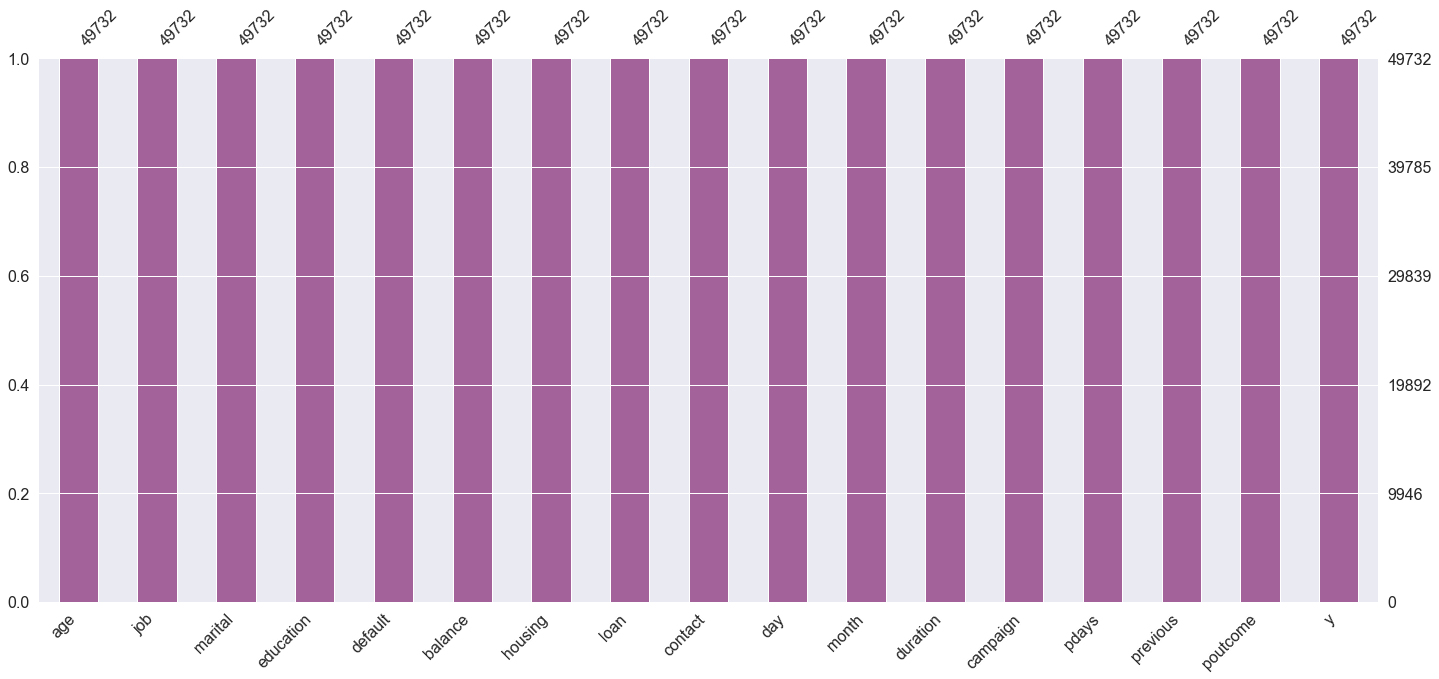

In [14]:
msno.bar(bank, color='#a3629a')

There are no missing values or the null values are present in our dataset

## Examining numbers of unique values in each column 

In [15]:
bank[numeric].nunique()

age           77
balance     7168
duration    1573
campaign      48
pdays        559
previous      41
dtype: int64

In [16]:
bank[category].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
day          31
month        12
poutcome      4
y             2
dtype: int64

## Examining Distribution of numeric data columns 

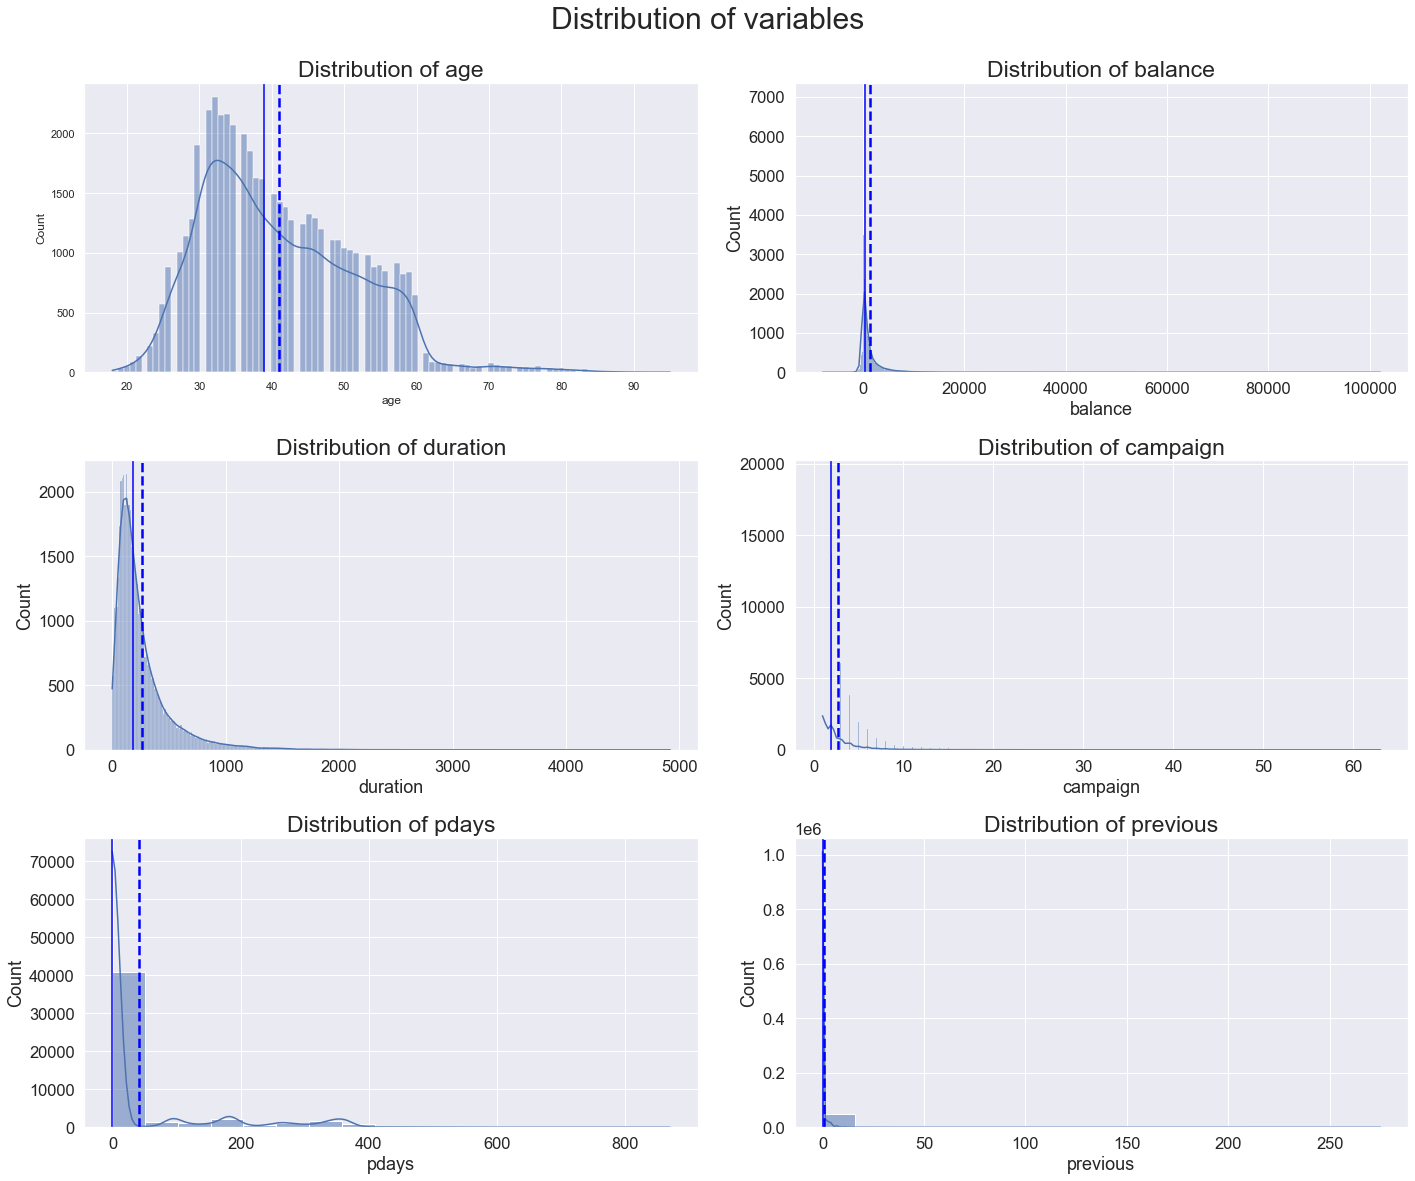

In [17]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.histplot(bank[i],kde=True, palette='Set3')    
    ax.set_title('Distribution of %s'%(i), fontsize=23)
    plt.axvline(x=bank[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=bank[i].median(), color='blue',label='medain')
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)
plt.show()


- ### Examining outliers for the numeric columns 

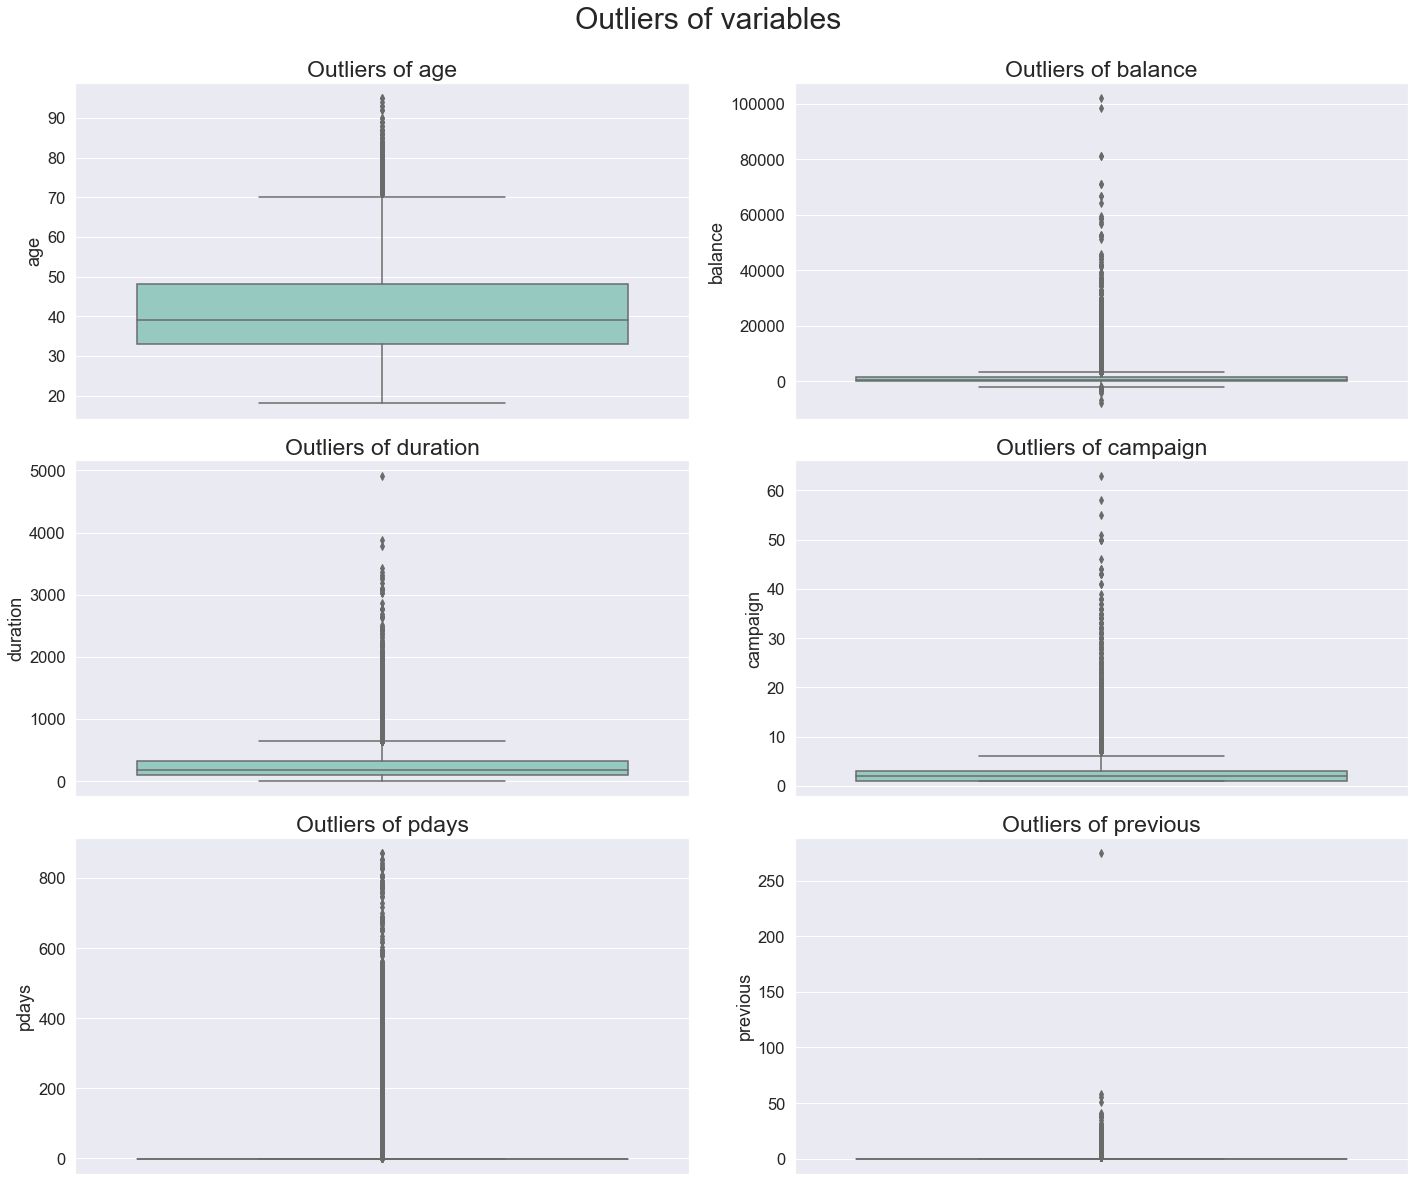

In [18]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.boxplot(y=bank[i], palette='Set3')    
    ax.set_title('Outliers of %s'%(i), fontsize=23)
    n+=1 
    plt.tight_layout()
plt.suptitle('Outliers of variables', y=1.03, fontsize=30)
plt.show()


Here we are having extreame outliers and highly skewed data.

- ### Checking skewness value for numeric data column

In [19]:
bank[numeric].skew()

age          0.686033
balance      8.204429
duration     3.109530
campaign     4.884266
pdays        2.624838
previous    40.783648
dtype: float64

We are having highly skewed data. If there are too much skewness in the data, then many statistical model don't work properly. So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model's performance.

So, for reducing the skewness **Transformation** is used. Transformation can be done by **Square root(sqrt)** transformation, **Cube root(cbrt)** transformation, **Log** transformation, **Boxcox** transormation and many others.

- ### Applying Transformation

In [20]:
numeric

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [21]:
data_transform = [ 'balance', 'duration', 'campaign', 'pdays', 'previous']

 - **Log transformation**

In [22]:
bank_log = bank.copy(deep=True)
for i in data_transform:
    bank_log[i] = np.log(bank_log[i]+1)
bank_log[numeric].skew()

C:\Users\Rhytham\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Rhytham\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


age         0.686033
balance          NaN
duration   -0.455335
campaign    1.324308
pdays            NaN
previous    2.511950
dtype: float64

 - **Square root(sqrt) transformation**

In [23]:
bank_sqrt = bank.copy(deep=True)
for i in data_transform:
    bank_sqrt[i] = np.sqrt(bank_sqrt[i])
bank_sqrt[numeric].skew()

C:\Users\Rhytham\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


age         0.686033
balance     1.885586
duration    1.165189
campaign    2.201397
pdays      -0.284698
previous    2.850686
dtype: float64

 - **Cube root(cbrt) transformation**

In [24]:
bank_cbrt = bank.copy(deep=True)
for i in data_transform:
    bank_cbrt[i] = np.cbrt(bank_cbrt[i])
bank_cbrt[numeric].skew()

age         0.686033
balance    -0.076314
duration    0.634772
campaign    1.649735
pdays       1.763555
previous    2.053087
dtype: float64

In [25]:
bank1 = bank_cbrt.copy(deep=True)

***Conclusion***:-

Here **Cube root(cbrt) transformation** is overall performing better compare to other transformation methods. So, we are applying cube root transformation on the required coulumns  

## Distributions and outliers after transformation

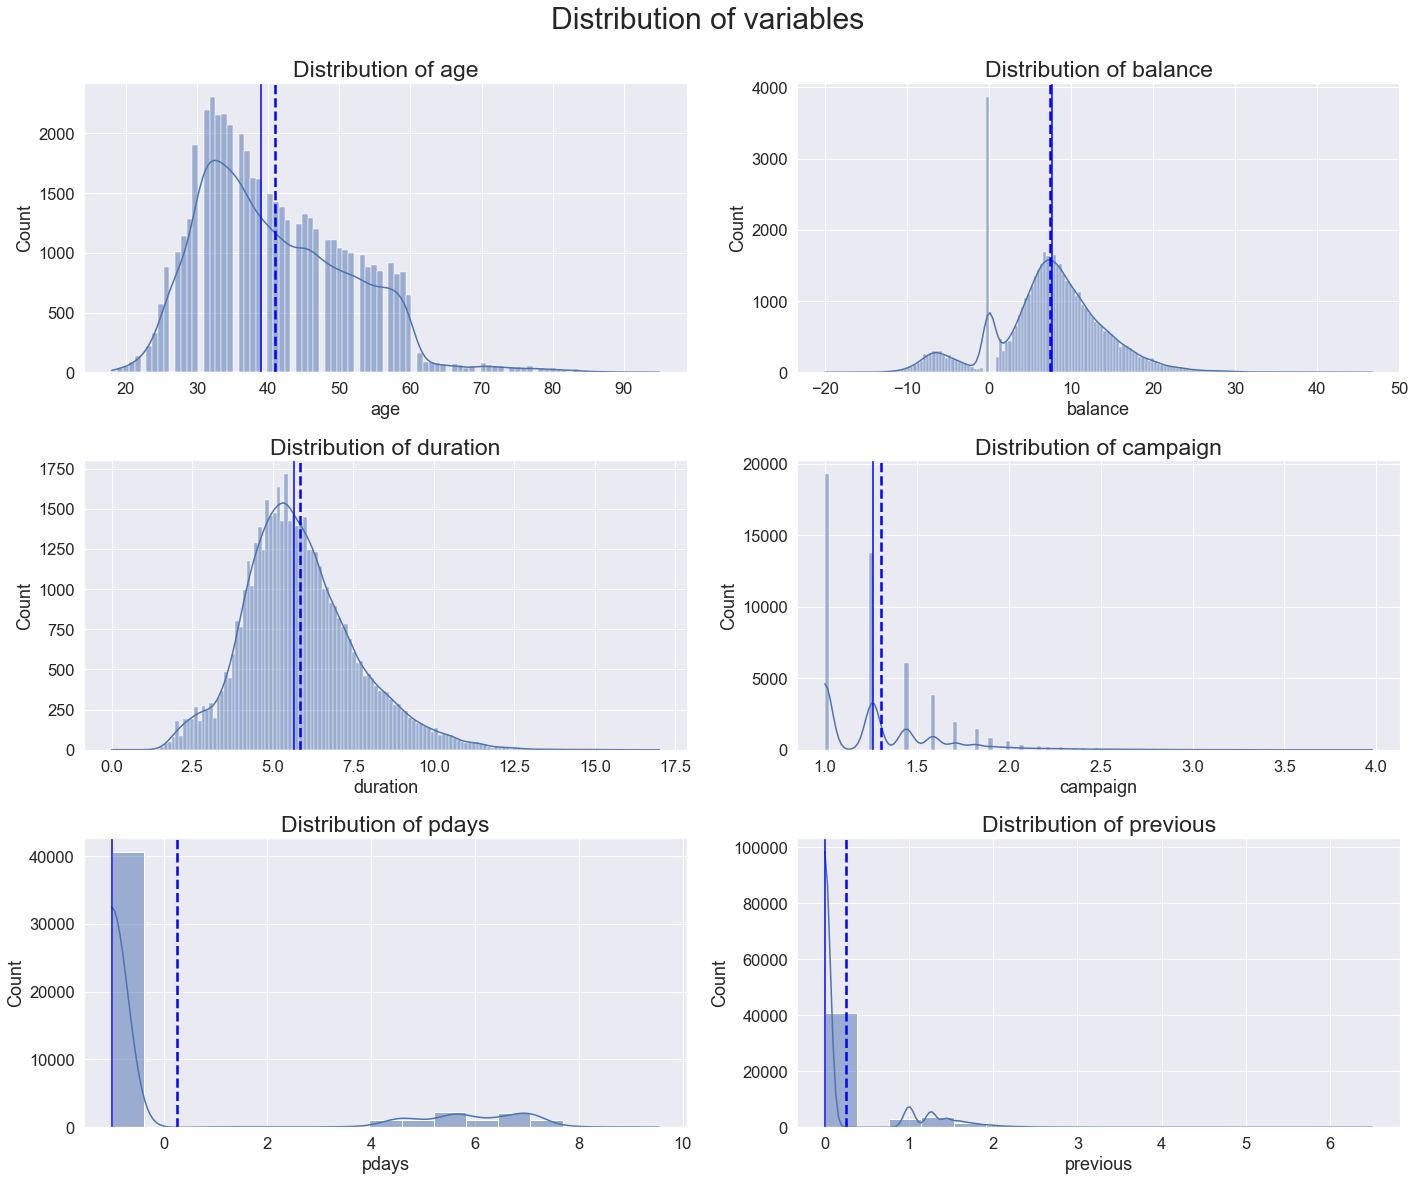

In [26]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.histplot(bank1[i],kde=True, palette='Set3')    
    ax.set_title('Distribution of %s'%(i), fontsize=23)
    plt.axvline(x=bank1[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=bank1[i].median(), color='blue',label='medain')
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)
plt.show()


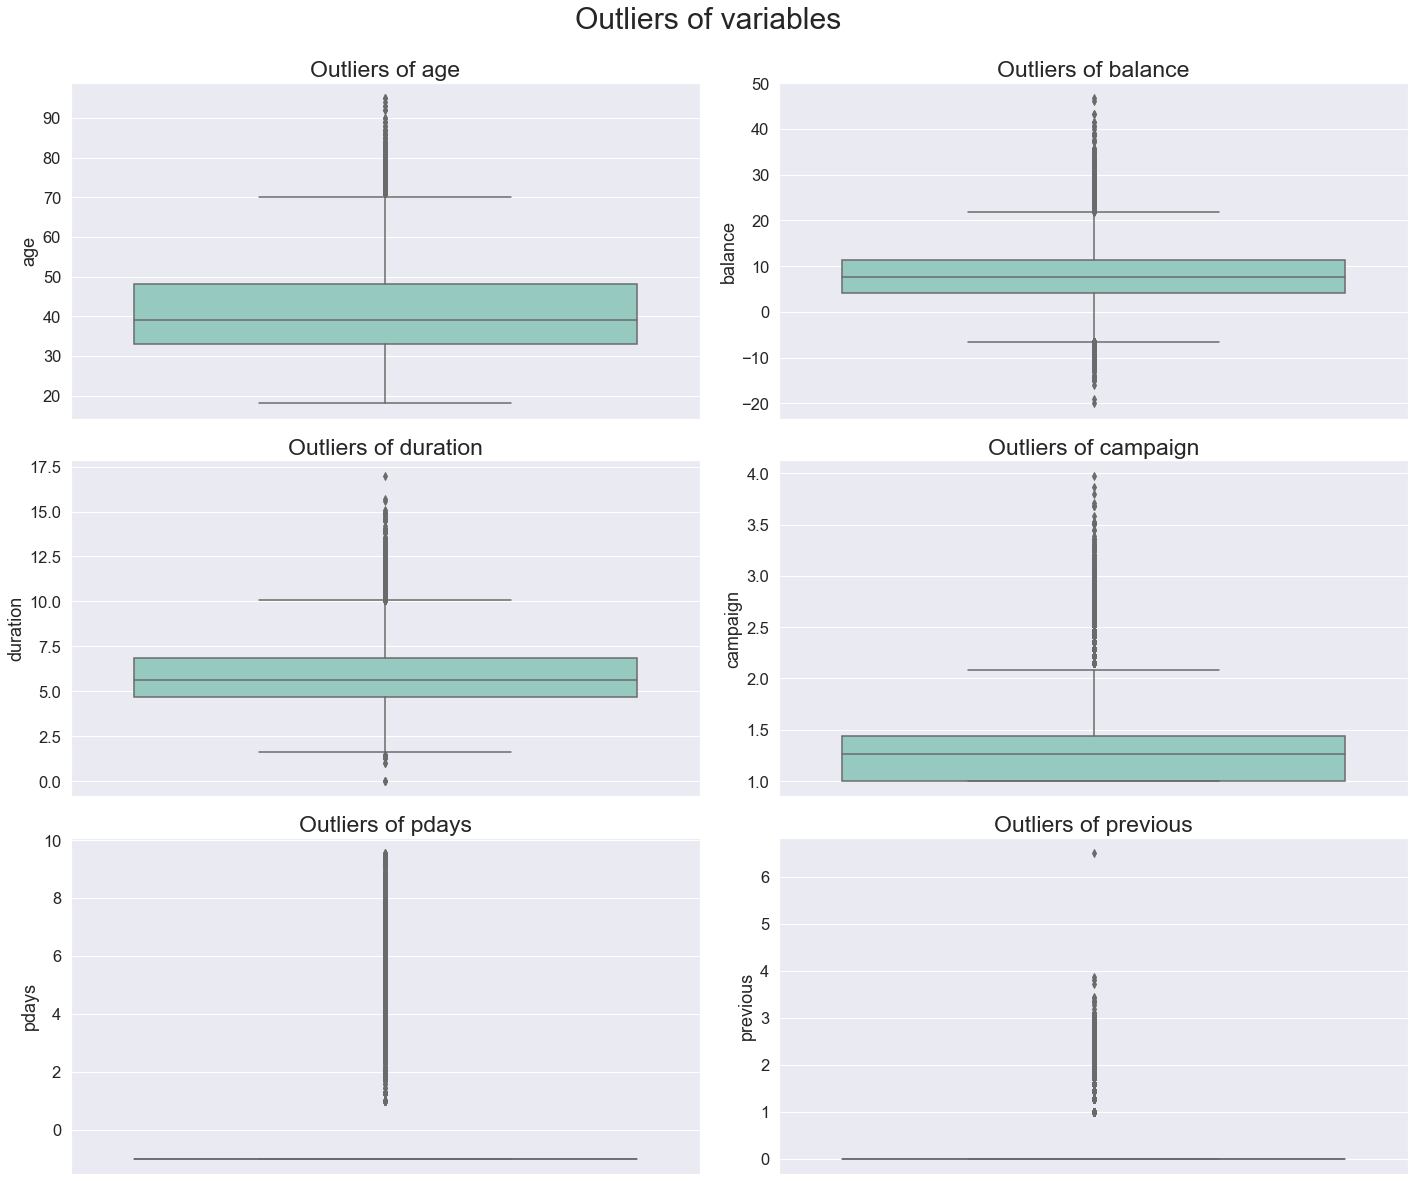

In [27]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.boxplot(y=bank1[i], palette='Set3')    
    ax.set_title('Outliers of %s'%(i), fontsize=23)
    n+=1 
    plt.tight_layout()
plt.suptitle('Outliers of variables', y=1.03, fontsize=30)
plt.show()


As we can see here, skewness and the outliers are decreased after applying Cuberoot transformation.

## Examining Distribution of categorical data columns

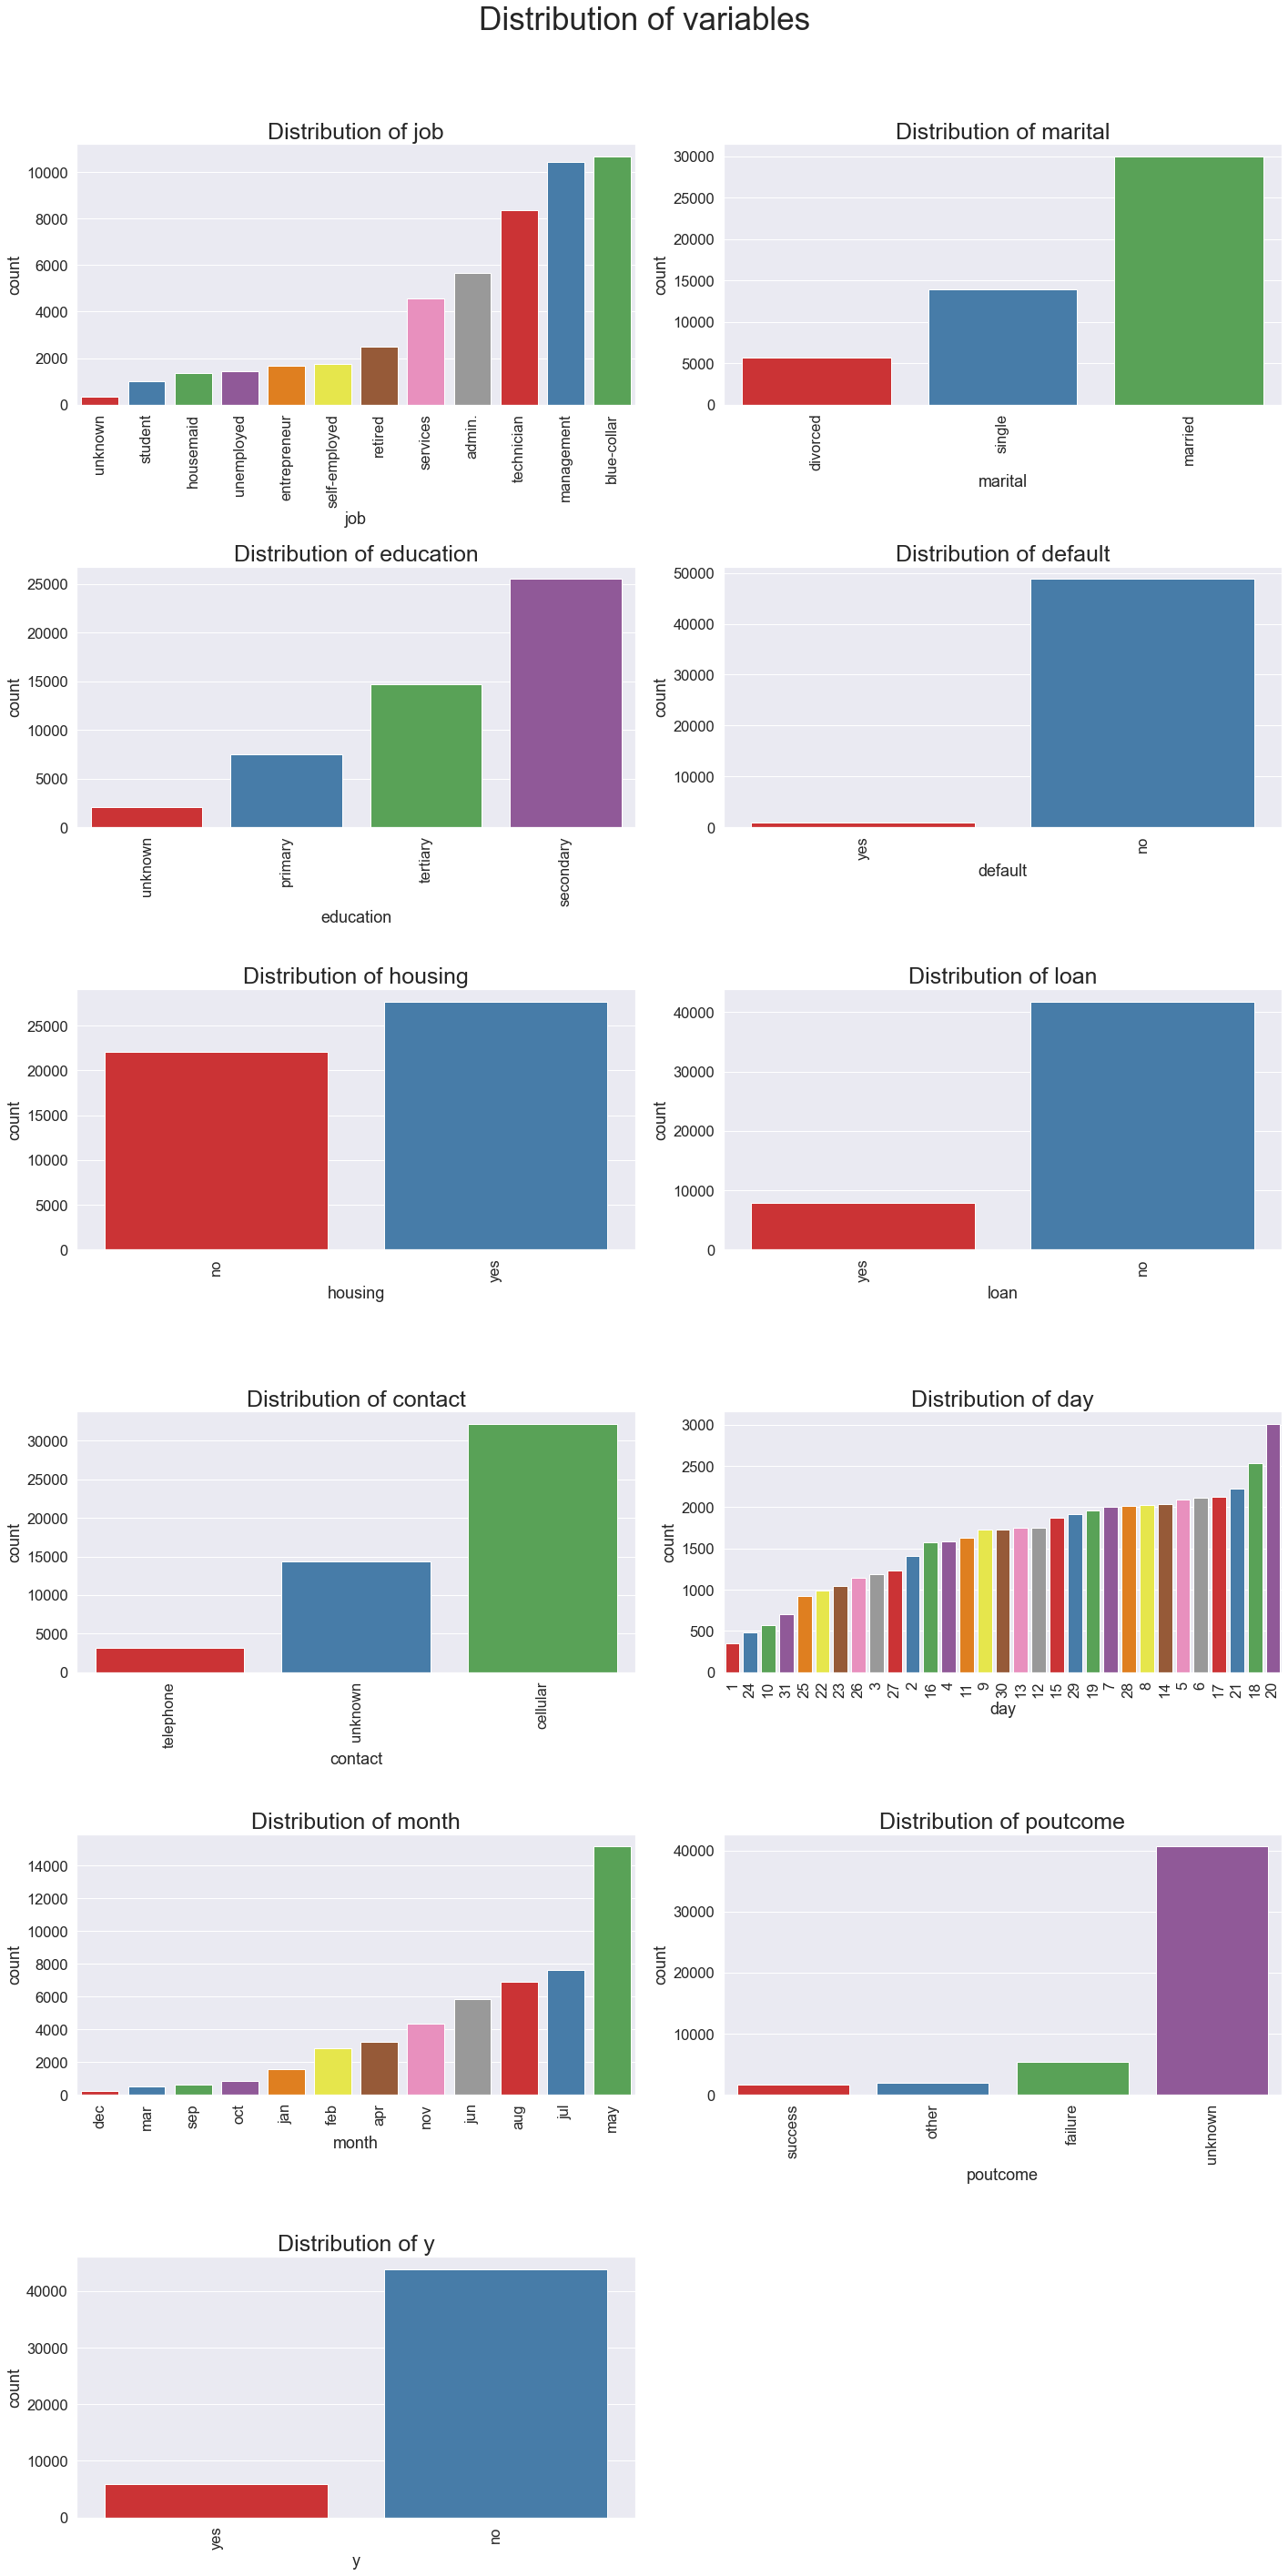

In [28]:
n=1
plt.subplots(figsize=(20, 50))
for i in category:
    plt.subplot(8,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.countplot(x = bank1[i], palette='Set1',order=bank1[i].value_counts().sort_values().index)    
    ax.set_title('Distribution of %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=35)
plt.show()


## Visualizing Numerical vs categorical Data 

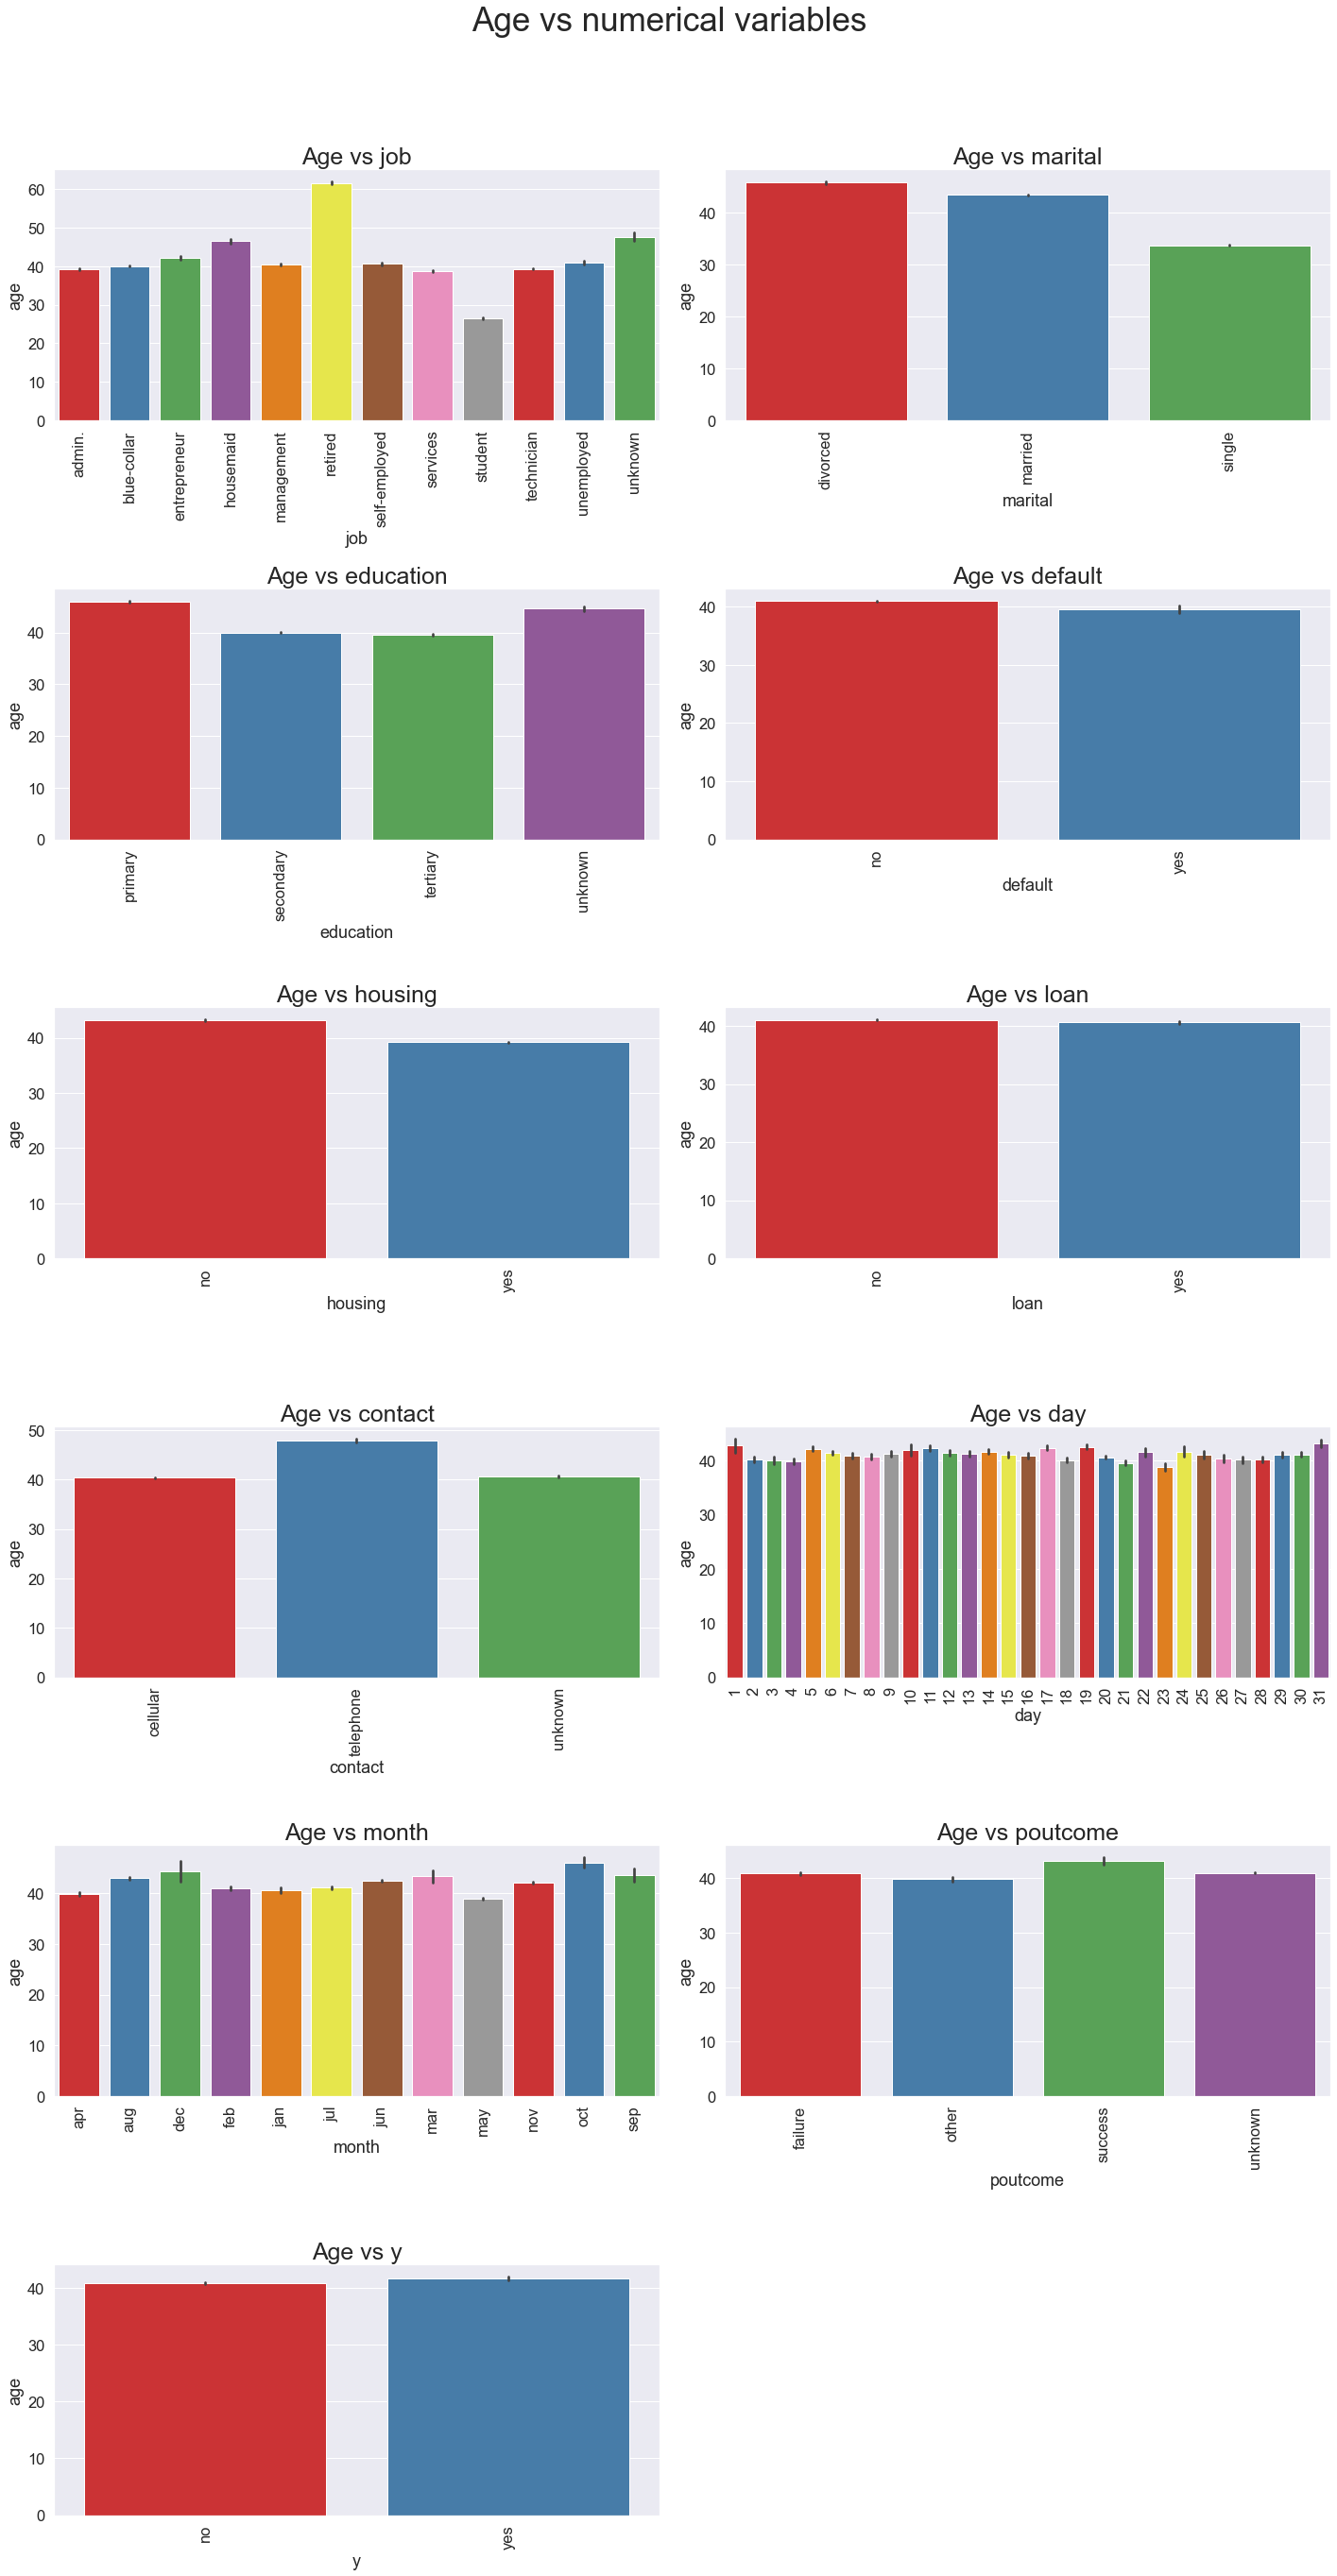

In [29]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank1['age'], palette='Set1')    
    ax.set_title('Age vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('Age vs numerical variables', y=1.03, fontsize=35)
plt.show()


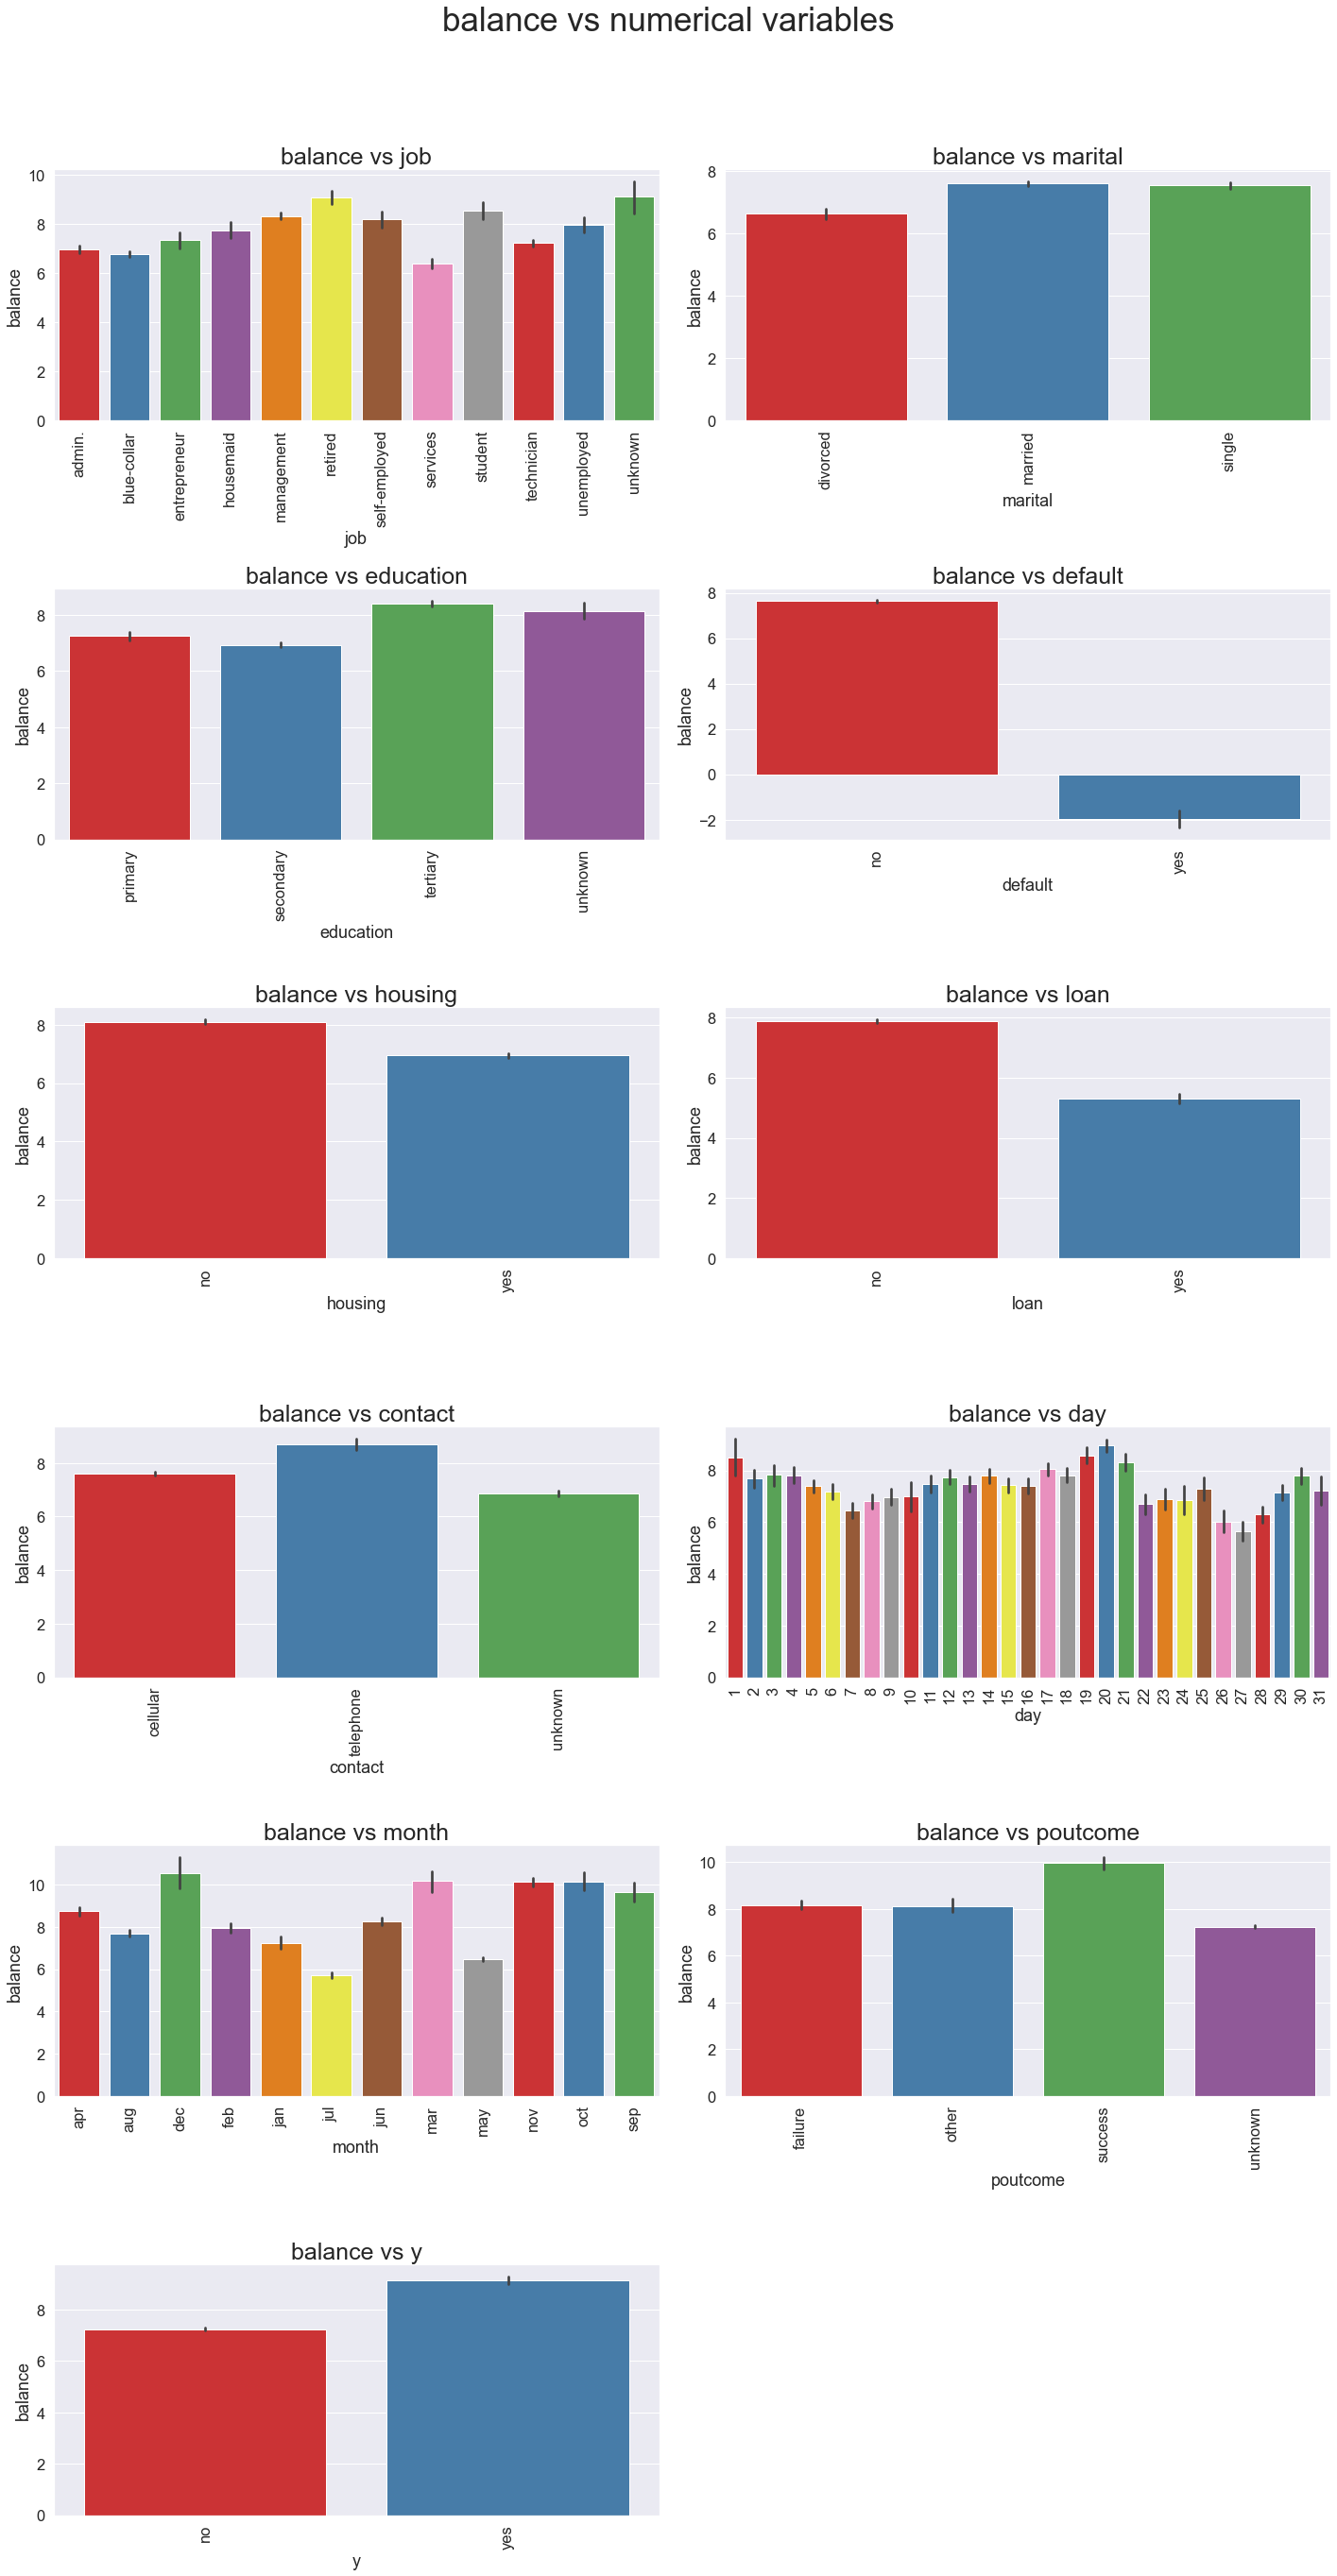

In [30]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank1['balance'], palette='Set1')    
    ax.set_title('balance vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('balance vs numerical variables', y=1.03, fontsize=35)
plt.show()


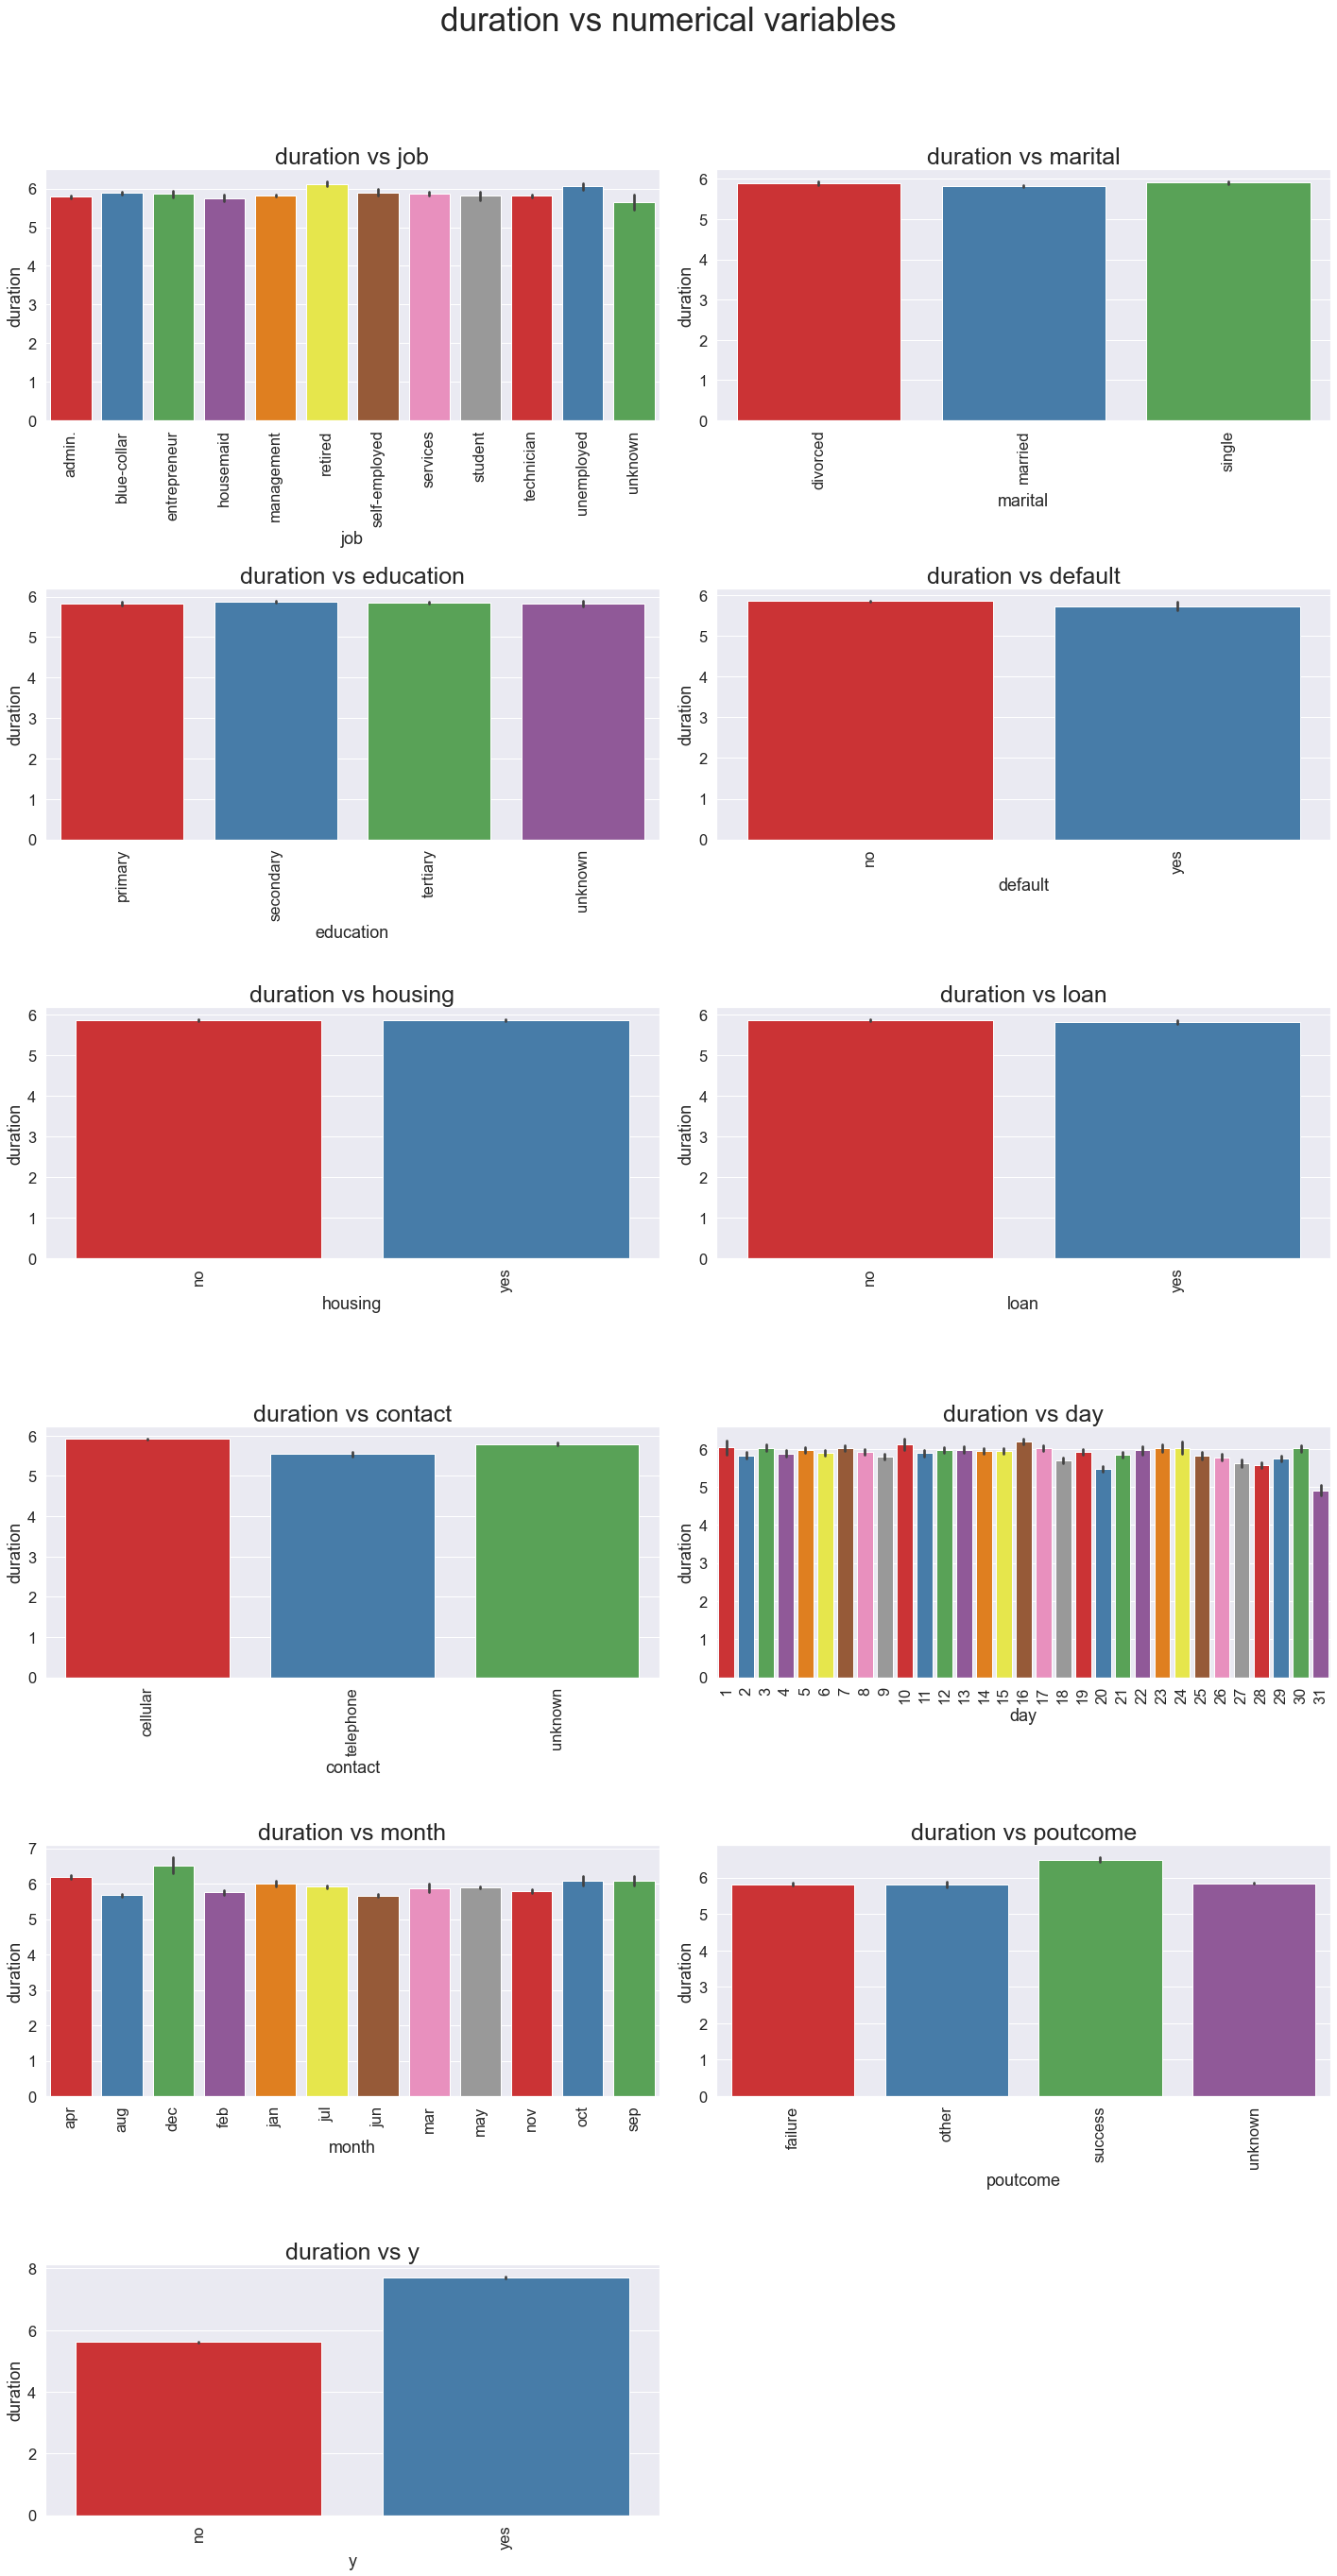

In [31]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank1['duration'], palette='Set1')    
    ax.set_title('duration vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('duration vs numerical variables', y=1.03, fontsize=35)
plt.show()


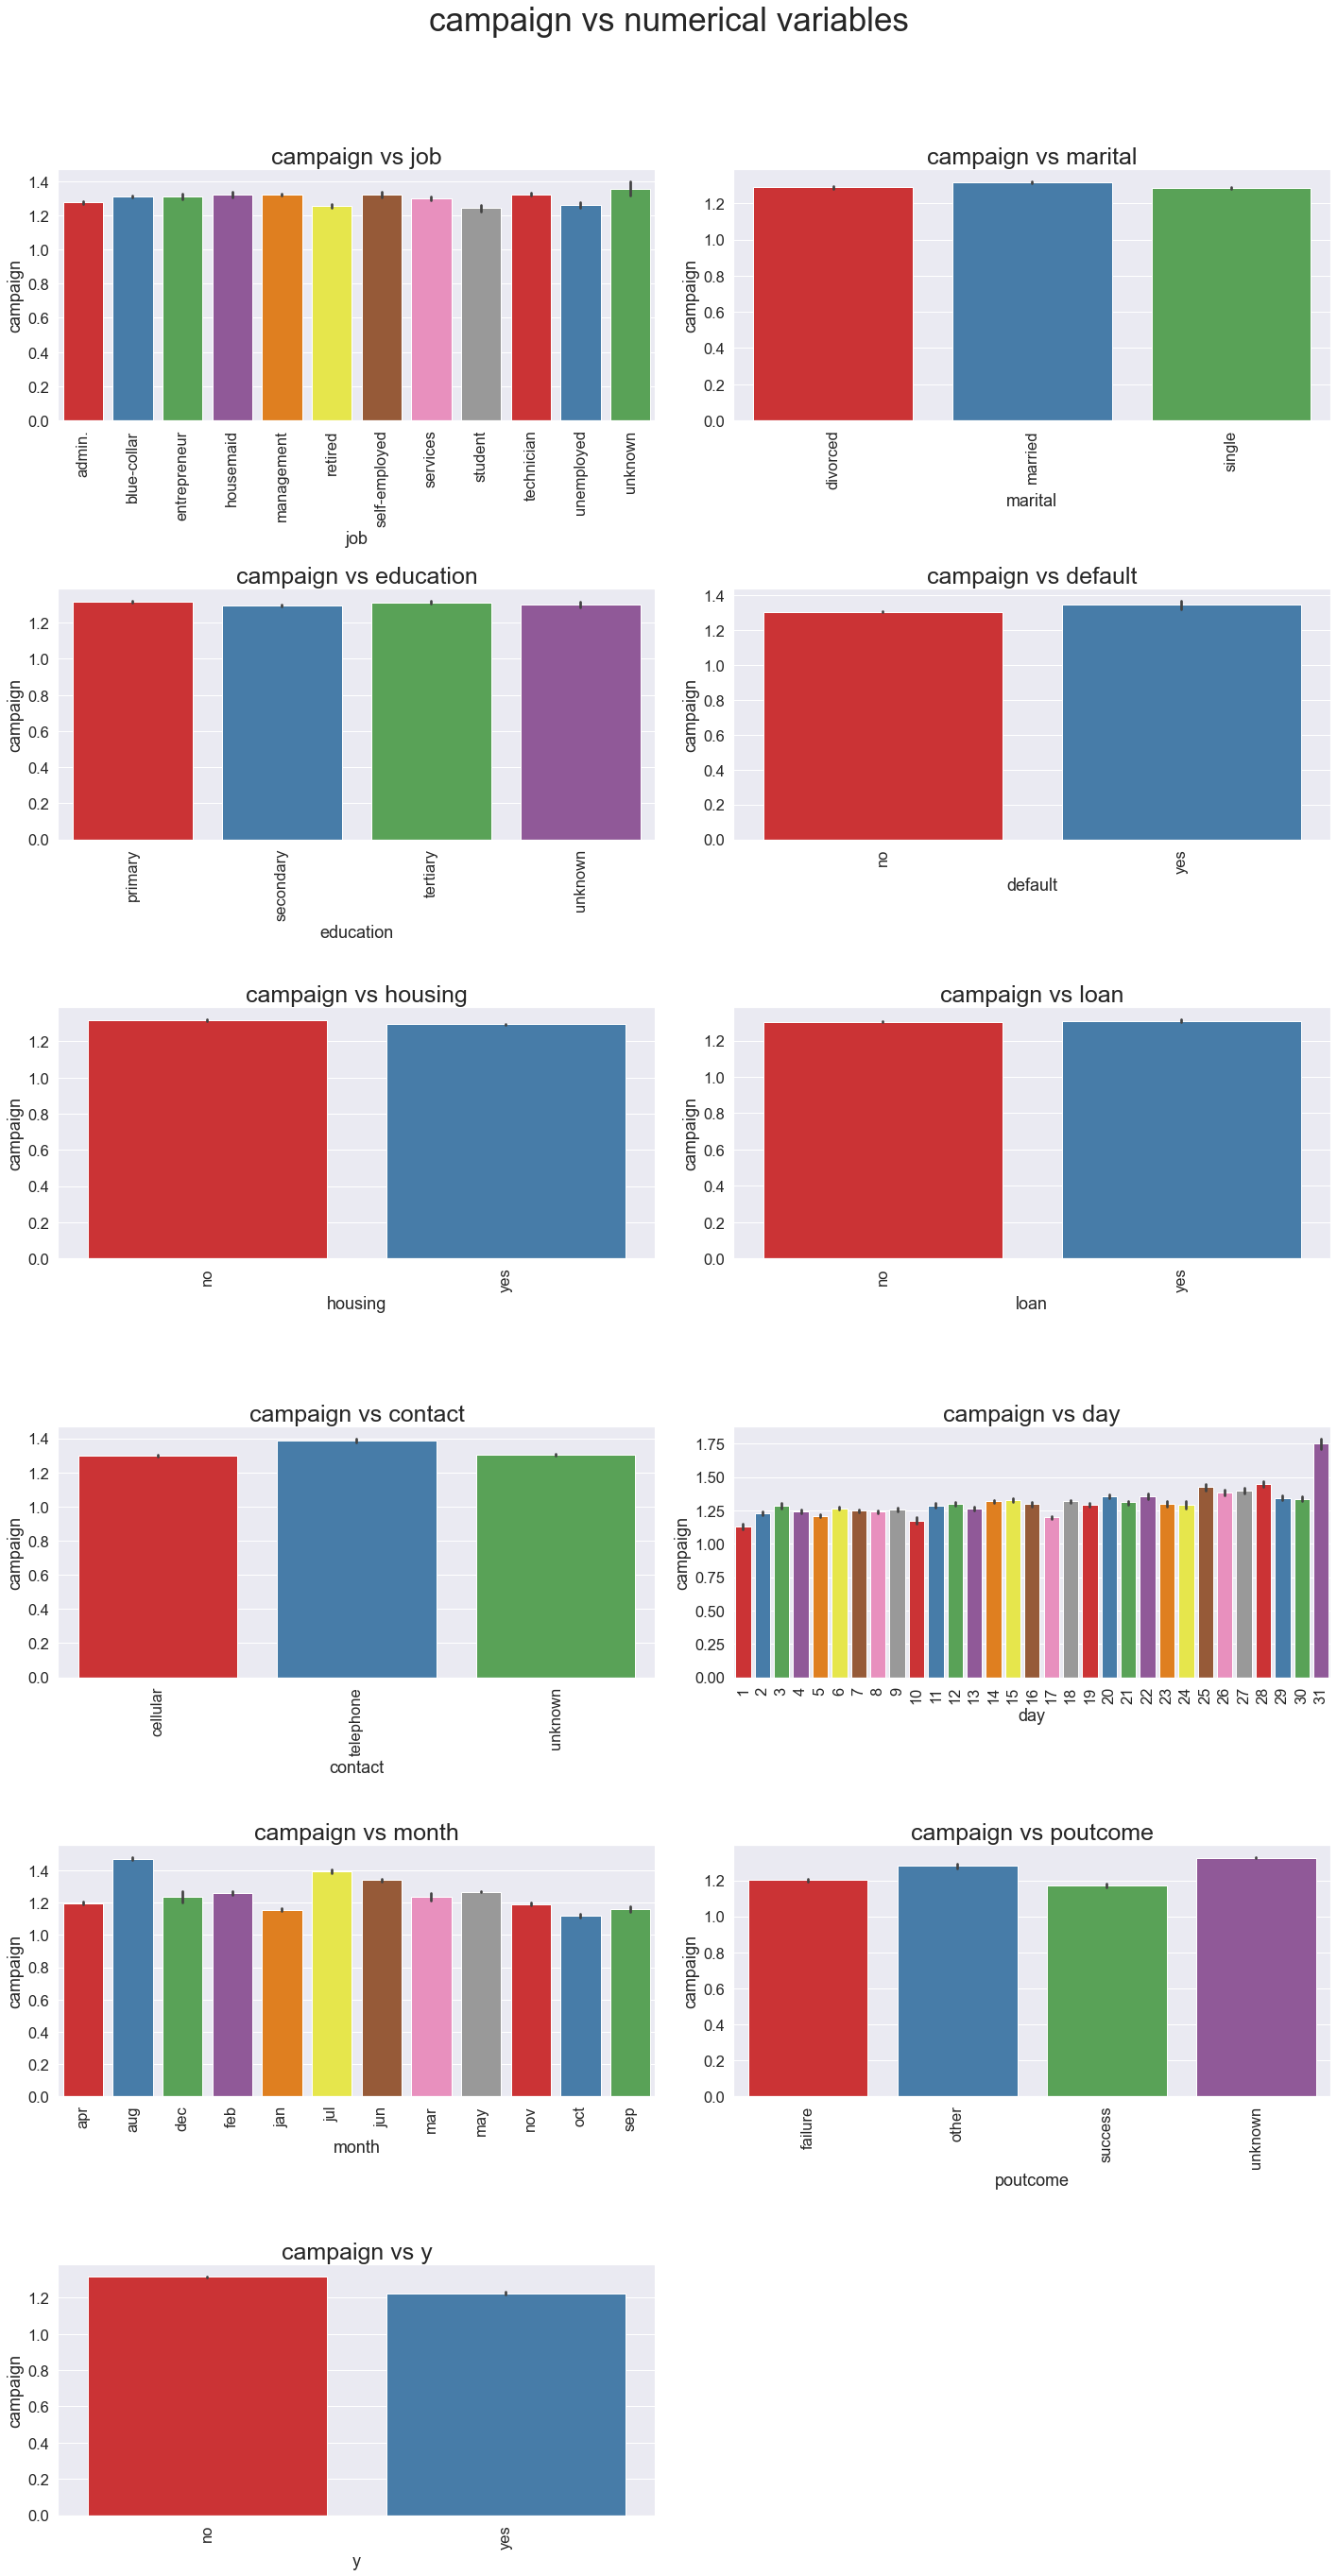

In [32]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank1['campaign'], palette='Set1')    
    ax.set_title('campaign vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('campaign vs numerical variables', y=1.03, fontsize=35)
plt.show()


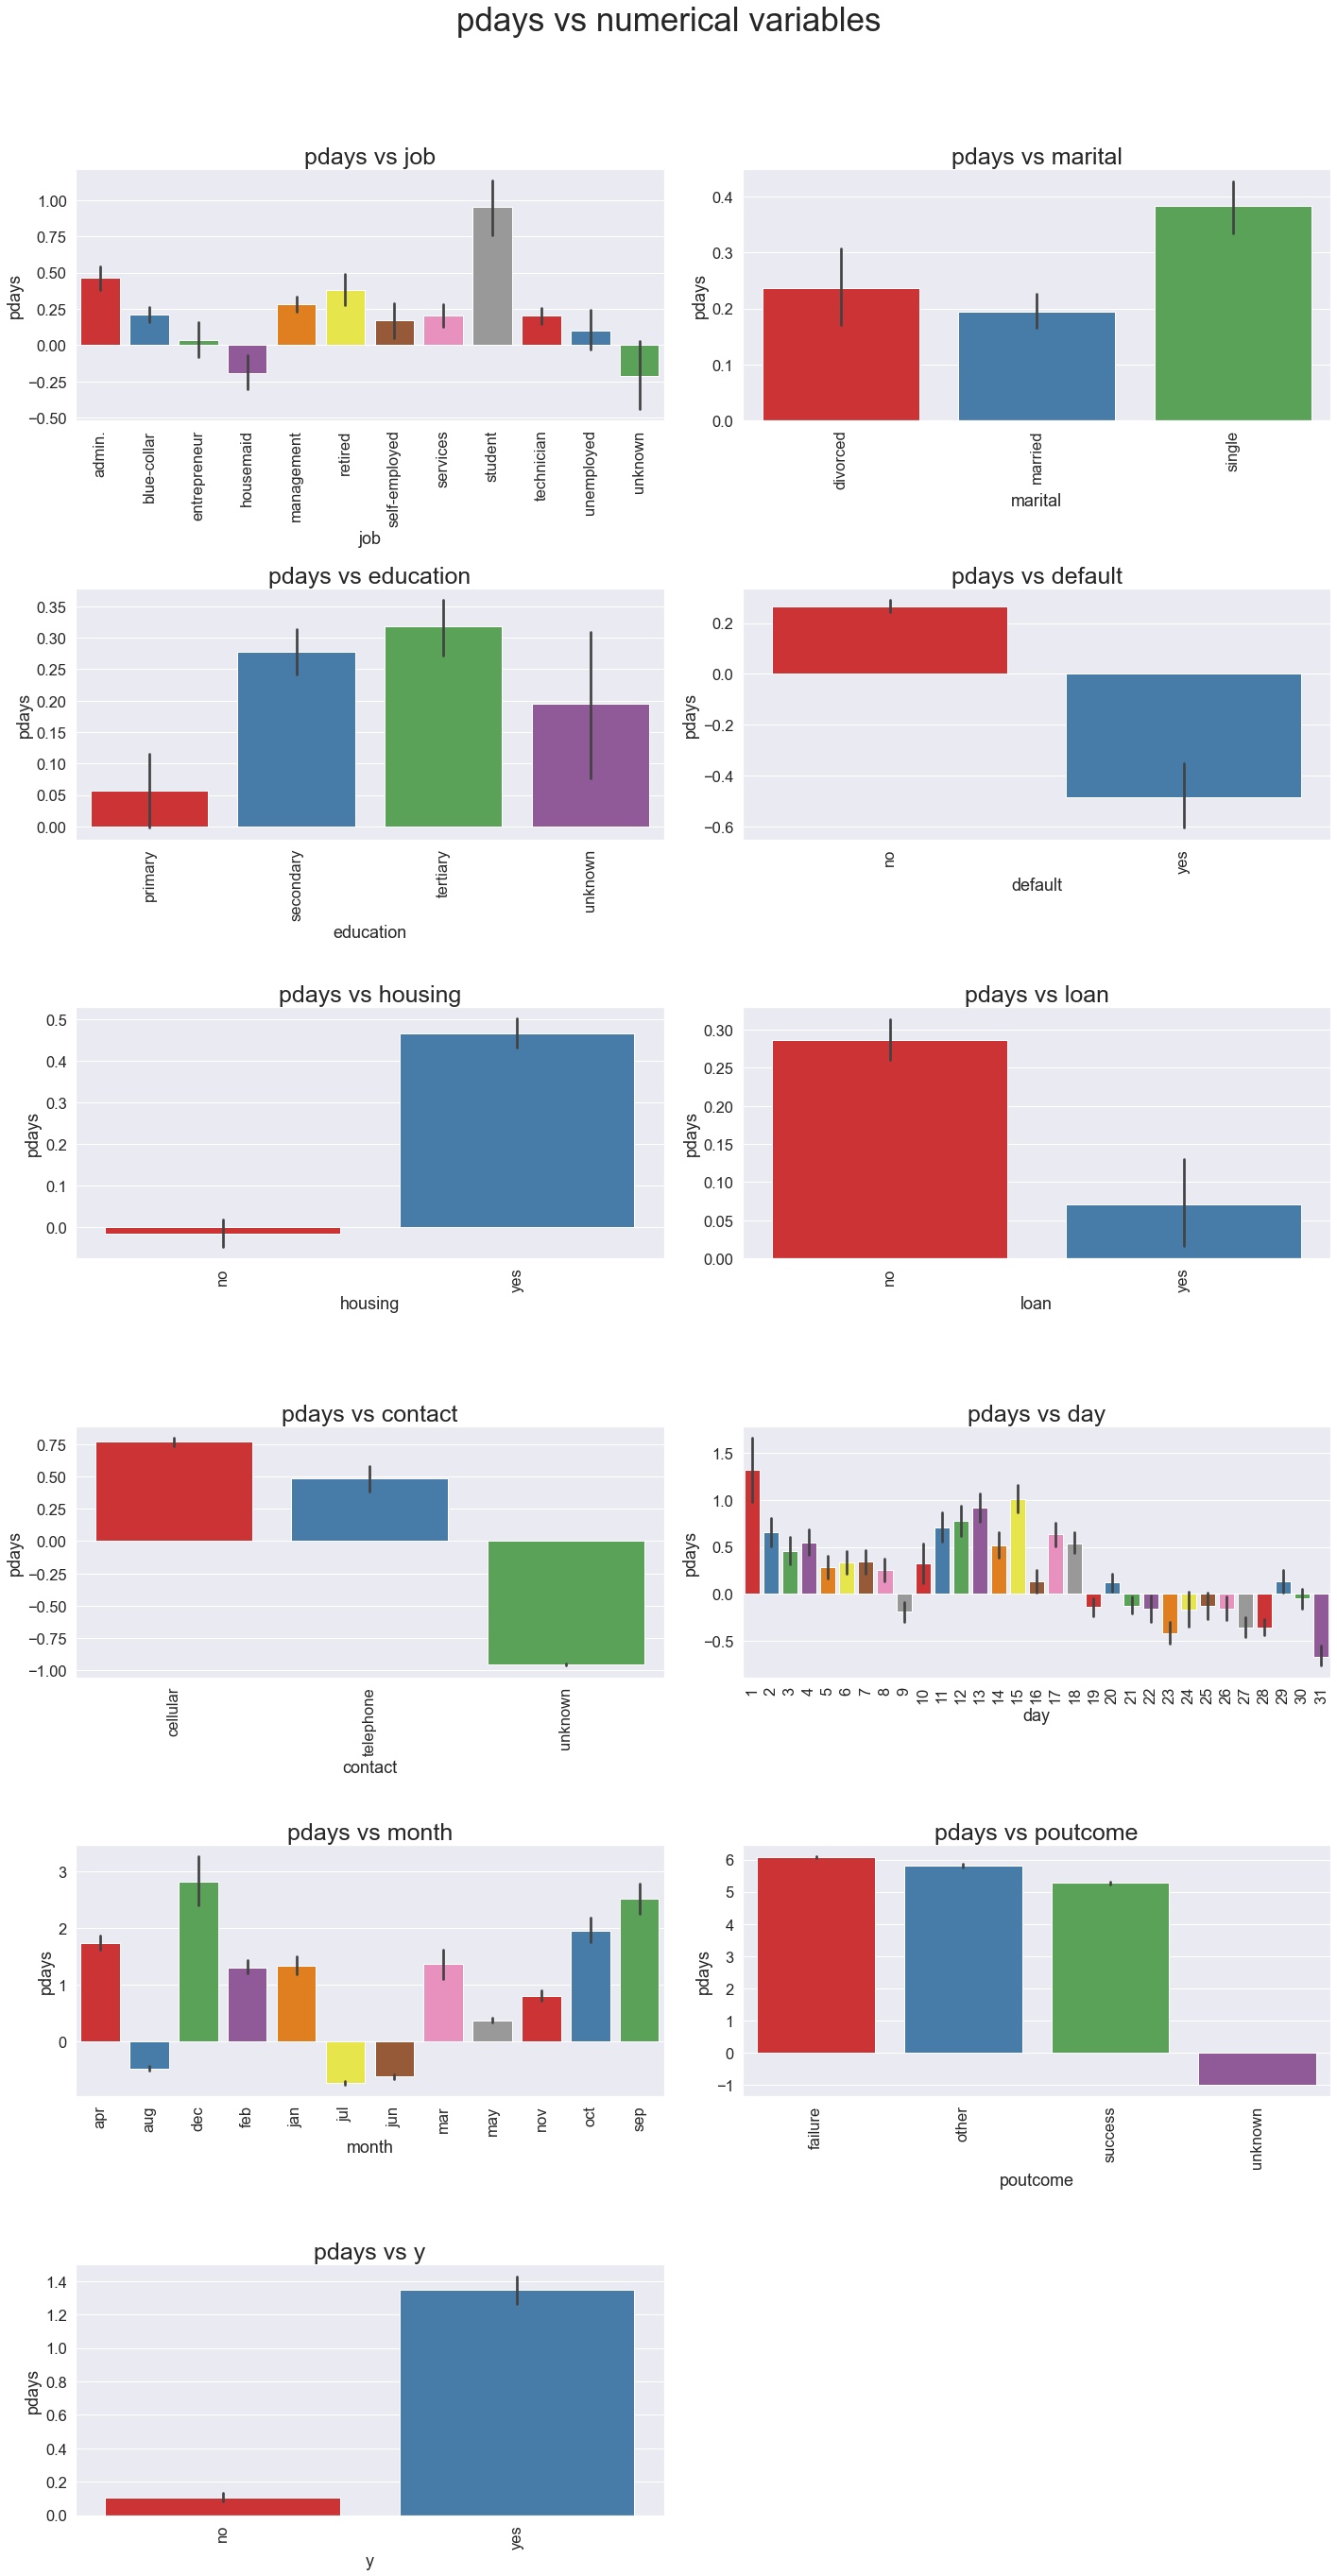

In [33]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank1['pdays'], palette='Set1')    
    ax.set_title('pdays vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('pdays vs numerical variables', y=1.03, fontsize=35)
plt.show()


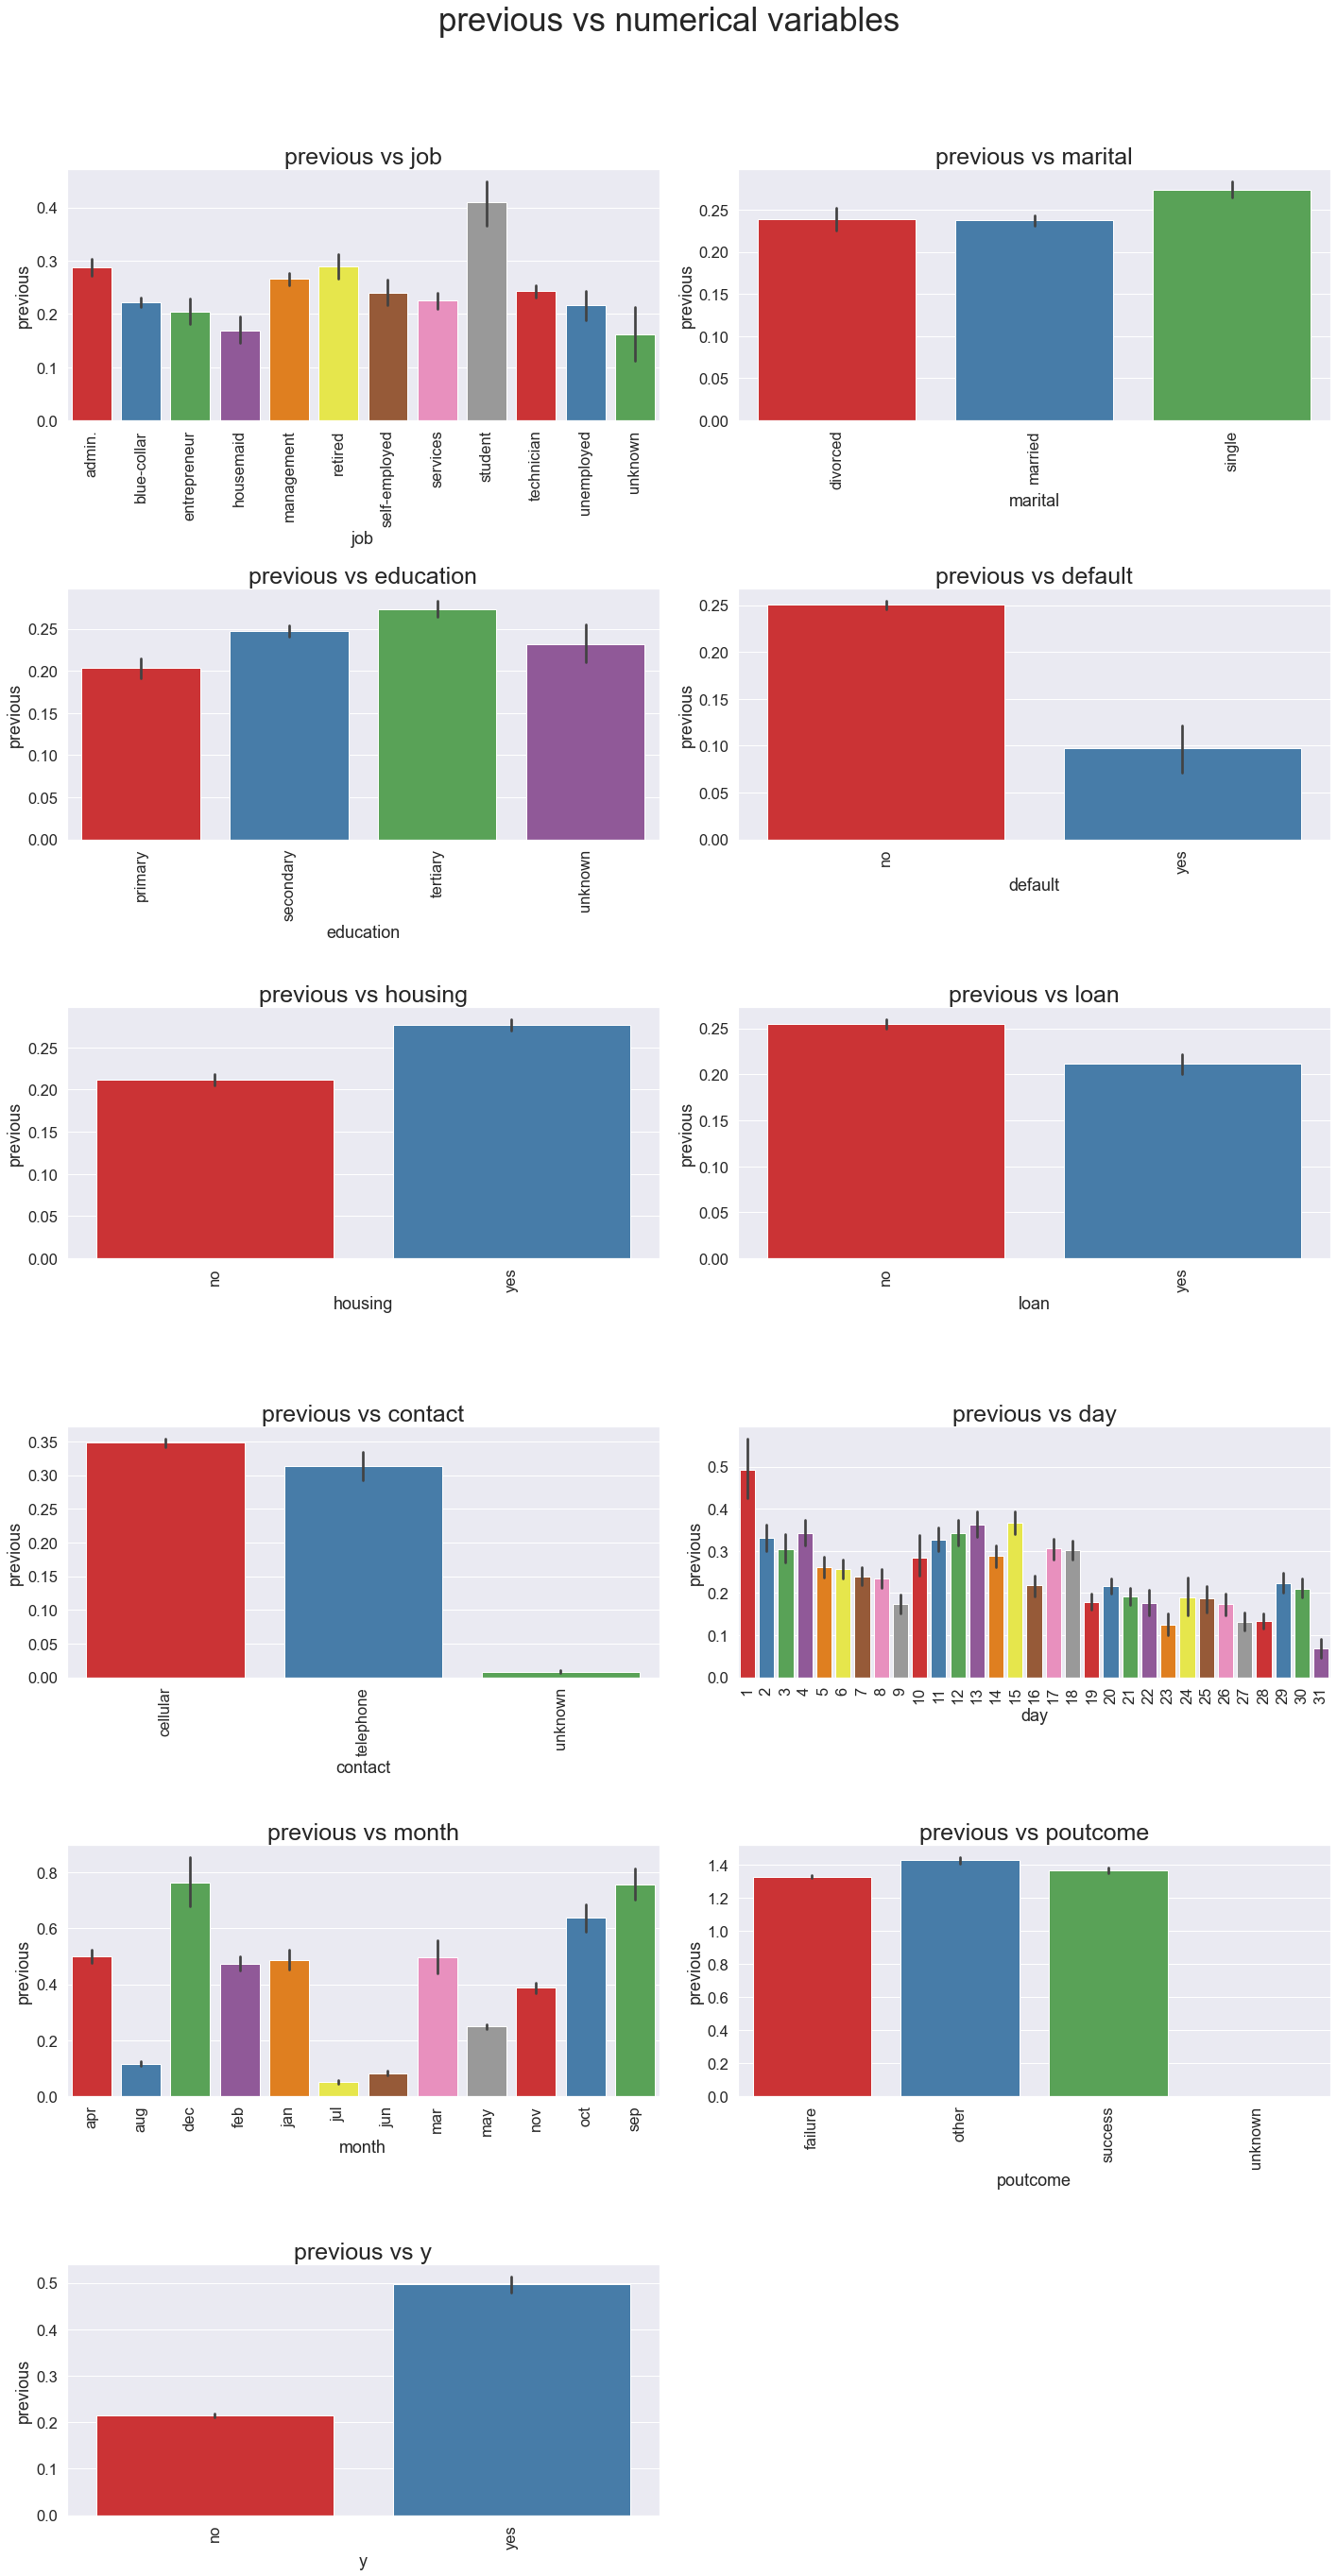

In [34]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank1['previous'], palette='Set1')    
    ax.set_title('previous vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('previous vs numerical variables', y=1.03, fontsize=35)
plt.show()


## Finding which campaign was effective for which type/group of people and also analysing if they have anything common among them.

In [35]:
bank1["smplAge"] = bank1.age.copy()
bank1.loc[bank1["age"] < 30, "smplAge"] = 1
bank1.loc[(bank1["age"] >= 30) & (bank1["age"] < 40), "smplAge"] = 2
bank1.loc[(bank1["age"] >= 40) & (bank1["age"] < 50), "smplAge"] = 3
bank1.loc[(bank1["age"] >= 50) & (bank1["age"] < 60), "smplAge"] = 4
bank1.loc[bank1["age"] >= 60, "smplAge"] = 5

In [36]:
people_type = ['smplAge', 'job', 'marital', 'education']

In [37]:
for people in people_type:
    globals()[f"count_{people}"] = bank1.groupby(by=[people, "y"]).size().reset_index(name="counts")

In [38]:
yes_smplAge = count_smplAge.loc[count_smplAge['y'] == 'yes']
max_smplAge_counts = yes_smplAge['counts'].max()

yes_job = count_job.loc[count_job['y'] == 'yes']
max_job_counts = yes_job['counts'].max()

yes_merital = count_marital.loc[count_marital['y'] == 'yes']
max_merital_counts = yes_merital['counts'].max()

yes_education = count_education.loc[count_education['y'] == 'yes']
max_education_counts = yes_education['counts'].max()

In [39]:
yes_smplAge.sort_values(by=['counts'],ascending=False)

,smplAge,y,counts
3,2,yes,2098
5,3,yes,1186
1,1,yes,1002
7,4,yes,869
9,5,yes,655


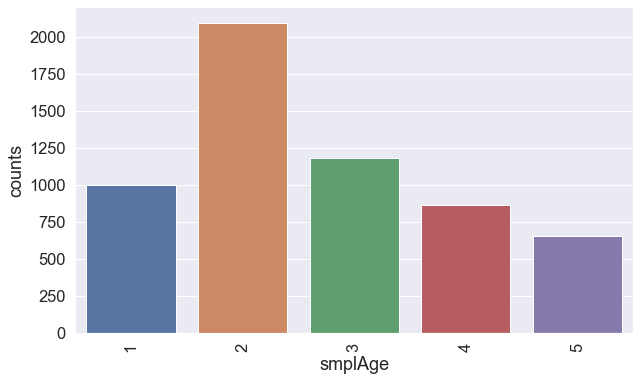

In [40]:
sns.barplot(x=yes_smplAge['smplAge'], y=yes_smplAge['counts'])
plt.xticks(rotation=90)
plt.show()

In [41]:
yes_job.sort_values(by=['counts'],ascending=False)

,job,y,counts
9,management,yes,1432
19,technician,yes,923
3,blue-collar,yes,777
1,admin.,yes,689
11,retired,yes,570
15,services,yes,407
17,student,yes,288
21,unemployed,yes,215
13,self-employed,yes,207
5,entrepreneur,yes,138


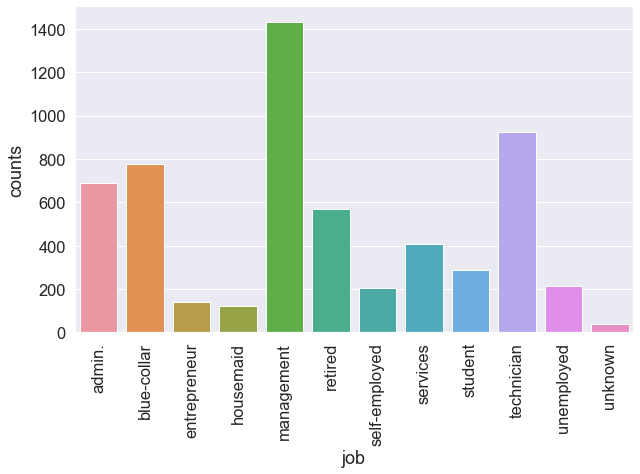

In [42]:
sns.barplot(x=yes_job['job'], y=yes_job['counts'])
plt.xticks(rotation=90)
plt.show()

In [43]:
yes_merital.sort_values(by=['counts'],ascending=False)

,marital,y,counts
3,married,yes,3032
5,single,yes,2079
1,divorced,yes,699


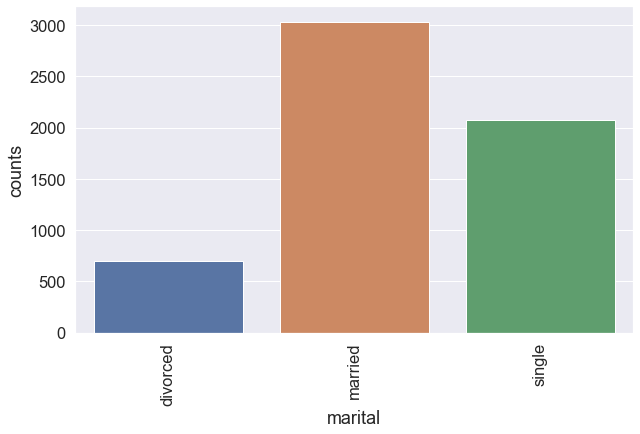

In [44]:
sns.barplot(x=yes_merital['marital'], y=yes_merital['counts'])
plt.xticks(rotation=90)
plt.show()

In [45]:
yes_education.sort_values(by=['counts'],ascending=False)

,education,y,counts
3,secondary,yes,2695
5,tertiary,yes,2189
1,primary,yes,655
7,unknown,yes,271


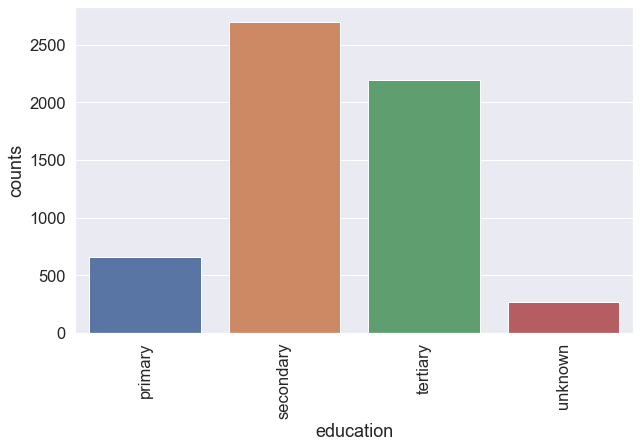

In [46]:
sns.barplot(x=yes_education['education'], y=yes_education['counts'])
plt.xticks(rotation=90)
plt.show()

**Conclusion**:-

Among all the category of all types of people, campaign was effective **Married** peoples. There are total **5810** yes present in our datset for **'y'** column. Among them **3032** were **married** people, from this we can conclude that campaign should target the married people.

- ### Analysing if they have anything common among them.

In [47]:
bank_yes =bank1.loc[(bank1['marital'] == 'married') & (bank1['y'] == 'yes')]
bank_yes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,smplAge
83,59,admin.,married,secondary,no,13.281815,yes,no,unknown,5,may,10.138084,1.000000,-1.000000,0.0,unknown,yes,4
86,56,admin.,married,secondary,no,3.556893,no,no,unknown,5,may,11.362573,1.000000,-1.000000,0.0,unknown,yes,4
87,41,technician,married,secondary,no,10.829321,yes,no,unknown,5,may,11.157513,1.000000,-1.000000,0.0,unknown,yes,3
129,55,services,married,secondary,no,13.528518,yes,no,unknown,5,may,8.334755,1.000000,-1.000000,0.0,unknown,yes,4
168,54,admin.,married,tertiary,no,5.687734,no,no,unknown,5,may,8.763381,1.259921,-1.000000,0.0,unknown,yes,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49613,41,entrepreneur,married,primary,no,3.391211,yes,no,cellular,21,nov,8.188244,1.259921,-1.000000,0.0,unknown,yes,3
49644,40,management,married,tertiary,no,-2.571282,yes,yes,cellular,11,may,7.796975,1.000000,6.349604,1.0,success,yes,3
49695,38,management,married,tertiary,no,15.089831,no,no,cellular,21,nov,8.719760,1.587401,-1.000000,0.0,unknown,yes,2
49714,60,self-employed,married,primary,no,7.126936,no,yes,cellular,29,jul,9.344657,1.817121,-1.000000,0.0,unknown,yes,5


In [48]:
bank_yes.loc[(bank1['housing'] == 'no') | (bank1['loan'] == 'no')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,smplAge
83,59,admin.,married,secondary,no,13.281815,yes,no,unknown,5,may,10.138084,1.000000,-1.0,0.0,unknown,yes,4
86,56,admin.,married,secondary,no,3.556893,no,no,unknown,5,may,11.362573,1.000000,-1.0,0.0,unknown,yes,4
87,41,technician,married,secondary,no,10.829321,yes,no,unknown,5,may,11.157513,1.000000,-1.0,0.0,unknown,yes,3
129,55,services,married,secondary,no,13.528518,yes,no,unknown,5,may,8.334755,1.000000,-1.0,0.0,unknown,yes,4
168,54,admin.,married,tertiary,no,5.687734,no,no,unknown,5,may,8.763381,1.259921,-1.0,0.0,unknown,yes,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49603,50,unemployed,married,secondary,no,14.973286,no,no,cellular,9,jun,6.205822,1.587401,-1.0,0.0,unknown,yes,4
49613,41,entrepreneur,married,primary,no,3.391211,yes,no,cellular,21,nov,8.188244,1.259921,-1.0,0.0,unknown,yes,3
49695,38,management,married,tertiary,no,15.089831,no,no,cellular,21,nov,8.719760,1.587401,-1.0,0.0,unknown,yes,2
49714,60,self-employed,married,primary,no,7.126936,no,yes,cellular,29,jul,9.344657,1.817121,-1.0,0.0,unknown,yes,5


In [49]:
bank_yes.loc[(bank1['age'] > 25) & (bank1['age'] < 95)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,smplAge
83,59,admin.,married,secondary,no,13.281815,yes,no,unknown,5,may,10.138084,1.000000,-1.000000,0.0,unknown,yes,4
86,56,admin.,married,secondary,no,3.556893,no,no,unknown,5,may,11.362573,1.000000,-1.000000,0.0,unknown,yes,4
87,41,technician,married,secondary,no,10.829321,yes,no,unknown,5,may,11.157513,1.000000,-1.000000,0.0,unknown,yes,3
129,55,services,married,secondary,no,13.528518,yes,no,unknown,5,may,8.334755,1.000000,-1.000000,0.0,unknown,yes,4
168,54,admin.,married,tertiary,no,5.687734,no,no,unknown,5,may,8.763381,1.259921,-1.000000,0.0,unknown,yes,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49613,41,entrepreneur,married,primary,no,3.391211,yes,no,cellular,21,nov,8.188244,1.259921,-1.000000,0.0,unknown,yes,3
49644,40,management,married,tertiary,no,-2.571282,yes,yes,cellular,11,may,7.796975,1.000000,6.349604,1.0,success,yes,3
49695,38,management,married,tertiary,no,15.089831,no,no,cellular,21,nov,8.719760,1.587401,-1.000000,0.0,unknown,yes,2
49714,60,self-employed,married,primary,no,7.126936,no,yes,cellular,29,jul,9.344657,1.817121,-1.000000,0.0,unknown,yes,5


**Conclusion:-**

As per our analysis the common thing for the most of the peoples was they were not having **house loan** or **personal loan**. And also thier age was between 25-95.

## Analysing relation between Y column and balance column

<AxesSubplot:xlabel='y', ylabel='balance'>

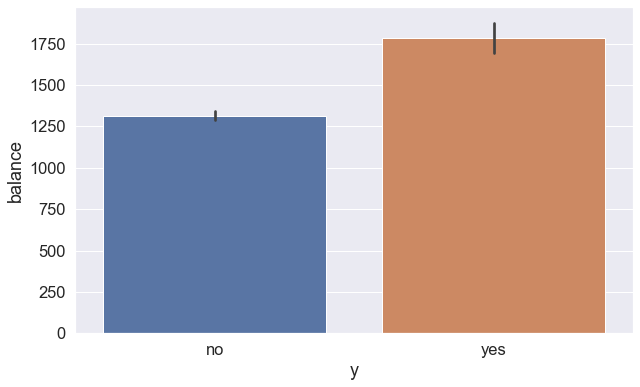

In [50]:
sns.barplot(x=bank['y'], y=bank['balance'])

### Final conclusion

1. Campaign was effective **Married** peoples. The common thing in most of them are:-

  - Not having housing or Personal loan
  - Thier age was between 25-95.
  
  
2. Also we have analysed that the client subscribed to a term deposit were having balance more than **1300**. 

## Q. Do the same for the people who did not respond to a campaign well and see if they have anything in common with each other.

In [51]:
no_smplAge = count_smplAge.loc[count_smplAge['y'] == 'no']
no_max_smplAge_counts = no_smplAge['counts'].max()

no_job = count_job.loc[count_job['y'] == 'no']
no_max_job_counts = no_job['counts'].max()

no_merital = count_marital.loc[count_marital['y'] == 'no']
no_max_merital_counts = no_merital['counts'].max()

no_education = count_education.loc[count_education['y'] == 'no']
no_max_education_counts = no_education['counts'].max()

In [52]:
no_smplAge.sort_values(by=['counts'],ascending=False)

,smplAge,y,counts
2,2,no,17799
4,3,no,11672
6,4,no,8395
0,1,no,4753
8,5,no,1303


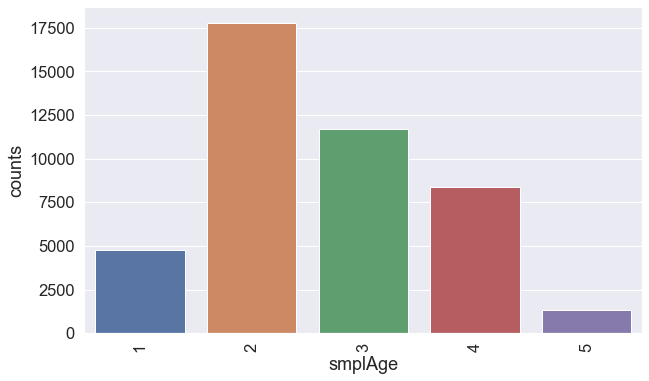

In [53]:
sns.barplot(x=no_smplAge['smplAge'], y=no_smplAge['counts'])
plt.xticks(rotation=90)
plt.show()

In [54]:
no_job.sort_values(by=['counts'],ascending=False)

,job,y,counts
2,blue-collar,no,9901
8,management,no,8995
18,technician,no,7442
0,admin.,no,4960
14,services,no,4164
10,retired,no,1924
12,self-employed,no,1555
4,entrepreneur,no,1517
6,housemaid,no,1229
20,unemployed,no,1216


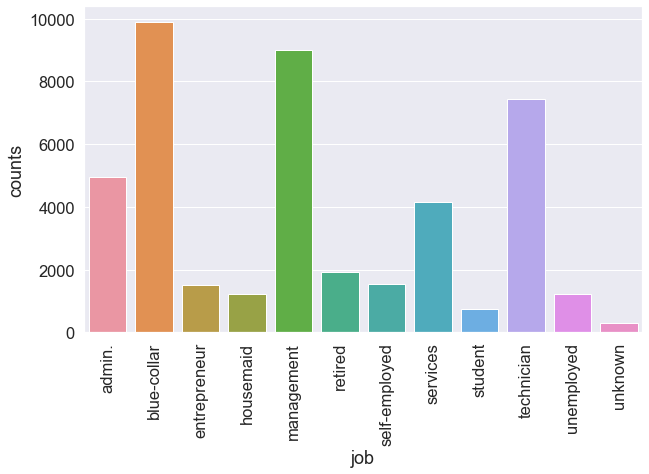

In [55]:
sns.barplot(x=no_job['job'], y=no_job['counts'])
plt.xticks(rotation=90)
plt.show()

In [56]:
no_merital.sort_values(by=['counts'],ascending=False)

,marital,y,counts
2,married,no,26979
4,single,no,11907
0,divorced,no,5036


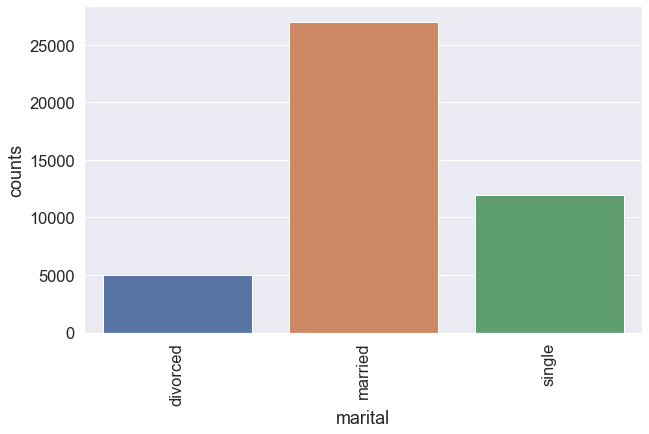

In [57]:
sns.barplot(x=no_merital['marital'], y=no_merital['counts'])
plt.xticks(rotation=90)
plt.show()

In [58]:
no_education.sort_values(by=['counts'],ascending=False)

,education,y,counts
2,secondary,no,22813
4,tertiary,no,12462
0,primary,no,6874
6,unknown,no,1773


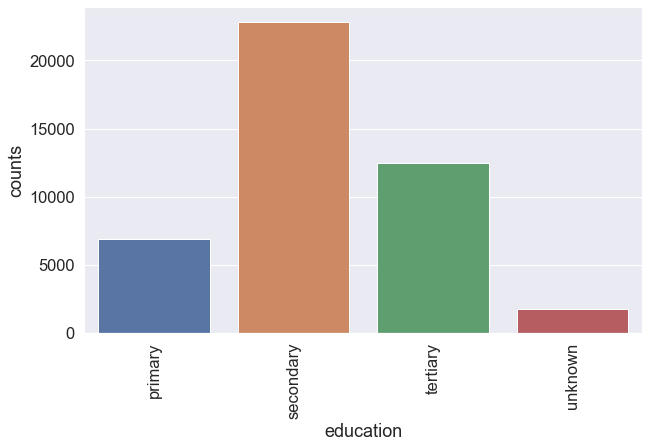

In [59]:
sns.barplot(x=no_education['education'], y=no_education['counts'])
plt.xticks(rotation=90)
plt.show()

**Conclusion**:-

**Married** people did not respond to a campaign well. There are total **43922** no outcome present in our datset for **'y'** column. Among them **26979** were **married** people, from this we can conclude that campaign should give more attention to the married people.

In [60]:
bank_no = bank1.loc[(bank1['marital'] == 'married') & (bank1['y'] == 'no')]
bank_no

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,smplAge
0,58,management,married,tertiary,no,12.892606,yes,no,unknown,5,may,6.390677,1.000000,-1.000000,0.00000,unknown,no,4
2,33,entrepreneur,married,secondary,no,1.259921,yes,yes,unknown,5,may,4.235824,1.000000,-1.000000,0.00000,unknown,no,2
3,47,blue-collar,married,unknown,no,11.462385,yes,no,unknown,5,may,4.514357,1.000000,-1.000000,0.00000,unknown,no,3
5,35,management,married,tertiary,no,6.135792,yes,no,unknown,5,may,5.180101,1.000000,-1.000000,0.00000,unknown,no,2
8,58,retired,married,primary,no,4.946087,yes,no,unknown,5,may,3.684031,1.000000,-1.000000,0.00000,unknown,no,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49725,38,blue-collar,married,secondary,no,10.641324,yes,no,cellular,20,apr,3.556893,1.587401,5.348481,1.00000,failure,no,2
49727,33,services,married,secondary,no,-6.931301,yes,no,cellular,30,jul,6.903436,1.709976,-1.000000,0.00000,unknown,no,2
49728,57,self-employed,married,tertiary,yes,-14.907580,yes,yes,unknown,9,may,5.348481,1.000000,-1.000000,0.00000,unknown,no,4
49729,57,technician,married,secondary,no,6.656930,no,no,cellular,19,aug,5.325074,2.223980,-1.000000,0.00000,unknown,no,4


In [61]:
bank_no.loc[(bank1['housing'] == 'yes') | (bank1['loan'] == 'yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,smplAge
0,58,management,married,tertiary,no,12.892606,yes,no,unknown,5,may,6.390677,1.000000,-1.000000,0.0,unknown,no,4
2,33,entrepreneur,married,secondary,no,1.259921,yes,yes,unknown,5,may,4.235824,1.000000,-1.000000,0.0,unknown,no,2
3,47,blue-collar,married,unknown,no,11.462385,yes,no,unknown,5,may,4.514357,1.000000,-1.000000,0.0,unknown,no,3
5,35,management,married,tertiary,no,6.135792,yes,no,unknown,5,may,5.180101,1.000000,-1.000000,0.0,unknown,no,2
8,58,retired,married,primary,no,4.946087,yes,no,unknown,5,may,3.684031,1.000000,-1.000000,0.0,unknown,no,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49719,42,admin.,married,unknown,no,8.626706,yes,yes,unknown,16,may,7.984344,1.259921,-1.000000,0.0,unknown,no,3
49723,40,blue-collar,married,secondary,no,10.322801,yes,no,unknown,29,may,8.706588,1.259921,-1.000000,0.0,unknown,no,3
49725,38,blue-collar,married,secondary,no,10.641324,yes,no,cellular,20,apr,3.556893,1.587401,5.348481,1.0,failure,no,2
49727,33,services,married,secondary,no,-6.931301,yes,no,cellular,30,jul,6.903436,1.709976,-1.000000,0.0,unknown,no,2


In [62]:
bank_no.loc[(bank1['previous'] == 0.0) ]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,smplAge
0,58,management,married,tertiary,no,12.892606,yes,no,unknown,5,may,6.390677,1.000000,-1.0,0.0,unknown,no,4
2,33,entrepreneur,married,secondary,no,1.259921,yes,yes,unknown,5,may,4.235824,1.000000,-1.0,0.0,unknown,no,2
3,47,blue-collar,married,unknown,no,11.462385,yes,no,unknown,5,may,4.514357,1.000000,-1.0,0.0,unknown,no,3
5,35,management,married,tertiary,no,6.135792,yes,no,unknown,5,may,5.180101,1.000000,-1.0,0.0,unknown,no,2
8,58,retired,married,primary,no,4.946087,yes,no,unknown,5,may,3.684031,1.000000,-1.0,0.0,unknown,no,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49723,40,blue-collar,married,secondary,no,10.322801,yes,no,unknown,29,may,8.706588,1.259921,-1.0,0.0,unknown,no,3
49724,49,blue-collar,married,secondary,no,6.854124,no,no,cellular,14,aug,7.087341,1.259921,-1.0,0.0,unknown,no,3
49727,33,services,married,secondary,no,-6.931301,yes,no,cellular,30,jul,6.903436,1.709976,-1.0,0.0,unknown,no,2
49728,57,self-employed,married,tertiary,yes,-14.907580,yes,yes,unknown,9,may,5.348481,1.000000,-1.0,0.0,unknown,no,4


### Final conclusion

**Married** peoples did not respond to a campaign well. The common thing in most of them are:-
 + Having housing or Personal loan
 + Number of contacts performed before this campaign is 0
